# Load Data

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt
from numba import njit
def set_report():
    # figsize
    hor = 0.8; sc = 0.8  # 0.5
    plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
        'font.size': 25,
        #'font.weight': "bold",  # bold fonts
        #'lines.linewidth': 1,  # thick lines
        'grid.color': "0.5",  # gray gridlines
        'grid.linewidth': 0.5,  # thin gridlines
        'savefig.pad_inches': 0.1,
        'savefig.dpi': 300,  # higher resolution output.
        'figure.dpi': 200,
        'figure.figsize': [sc * 11.69, sc * 8.27 * hor],
        'legend.handlelength': 0.5,
        'legend.handletextpad':0.5,
    })

set_report()

In [2]:
def load_file(num_spins, num_clauses, start_temperature, num_mc_steps, num_repetitions, fnum=0):
    folder_path = './data/raw/mc_clauses_with_unique_GS/' # mc_clauses_with_degenerate_GS
    file_name = f'EC3_N{num_spins}M{num_clauses}' + \
                f'_T{start_temperature}_mc{num_mc_steps}r{num_repetitions}_{fnum}'
    return np.load(folder_path + f'{file_name}.npz', allow_pickle=True)

In [3]:
data_args = dict(num_spins = 12,#7,
                 num_clauses = 10, #25,
                 num_instances = 10,#_000,
                 num_mc_steps = 100, #1000
                 start_temperature = 10,
                 num_repetitions = 10, #100# for the same instance different initial states for MC
                 anneal_T = 10,
                 anneal_steps = None, # 500
                 fnum = 0, # with degenerate: 0 all, 1 (disctinct random clauses, = F), 2
                )

In [4]:
file_args = ['num_spins', 'num_clauses', 'start_temperature', 'num_mc_steps', 'num_repetitions', 'fnum']
res = load_file(*[data_args[f'{arg}'] for arg in file_args], )

In [5]:
print(res.files, res['res_clauses'].shape)

['res_clauses', 'res_rand_spins', 'res_hamiltonian_diag', 'res_mc_timelines_energy', 'res_mc_timelines_state', 'res_fidelity'] (10, 10, 3)


# Check uniqueness clauses

In [6]:
# check all set of clauses (instances) are unique
res_clauses = res['res_clauses'] # I, M, 3
res_clauses.sort(axis=-1)
unique, counts = np.unique(res_clauses, return_counts=True, axis=0) # check disctinct sets of clauses
print(unique.shape==res['res_clauses'].shape, np.any(counts>=2))  # True, False
assert not np.any(counts>=2), 'There are repeated sets of clauses (instances) but it is not allowed'

True False


In [7]:
# res_clauses = np.array([res['res_clauses'][0],res['res_clauses'][5]])
res_clauses.sort(axis=-1)
clauses_disc_len = np.array([len(frozenset({tuple(row) for row in set_clauses})) for set_clauses in res_clauses])
assert np.all(clauses_disc_len==data_args['num_clauses']), 'There are repeated clauses'

In [8]:
np.unique(clauses_disc_len, return_counts=True)

(array([10]), array([10]))

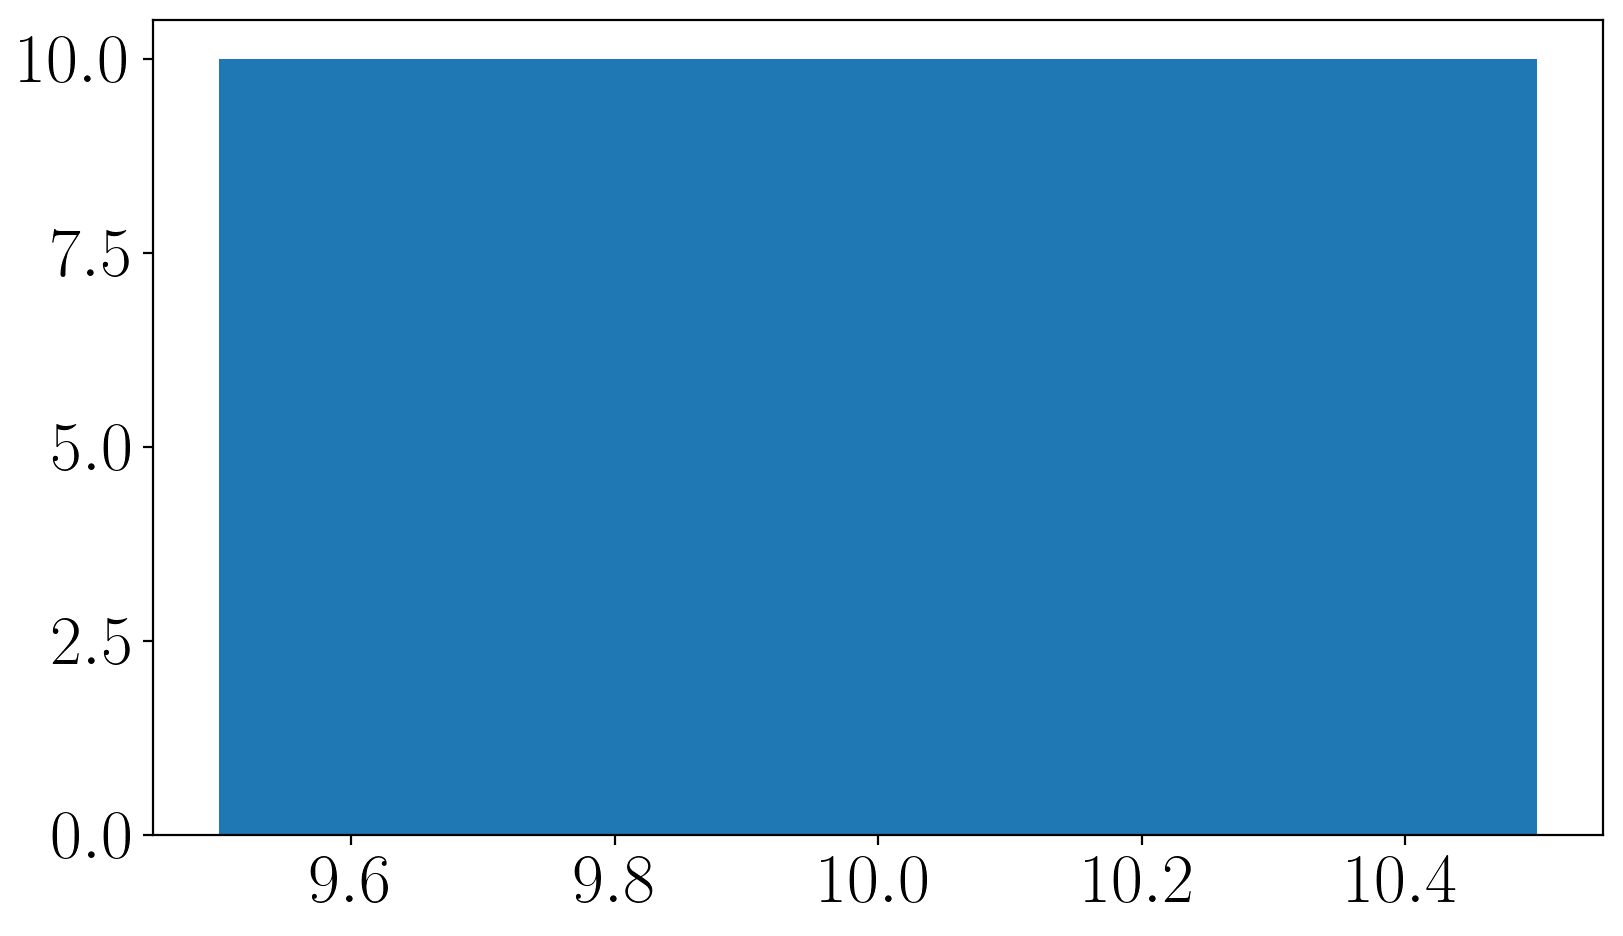

In [10]:
plt.hist(clauses_disc_len, bins=clauses_disc_len.max()-clauses_disc_len.min()+1);

# Raw data vis.

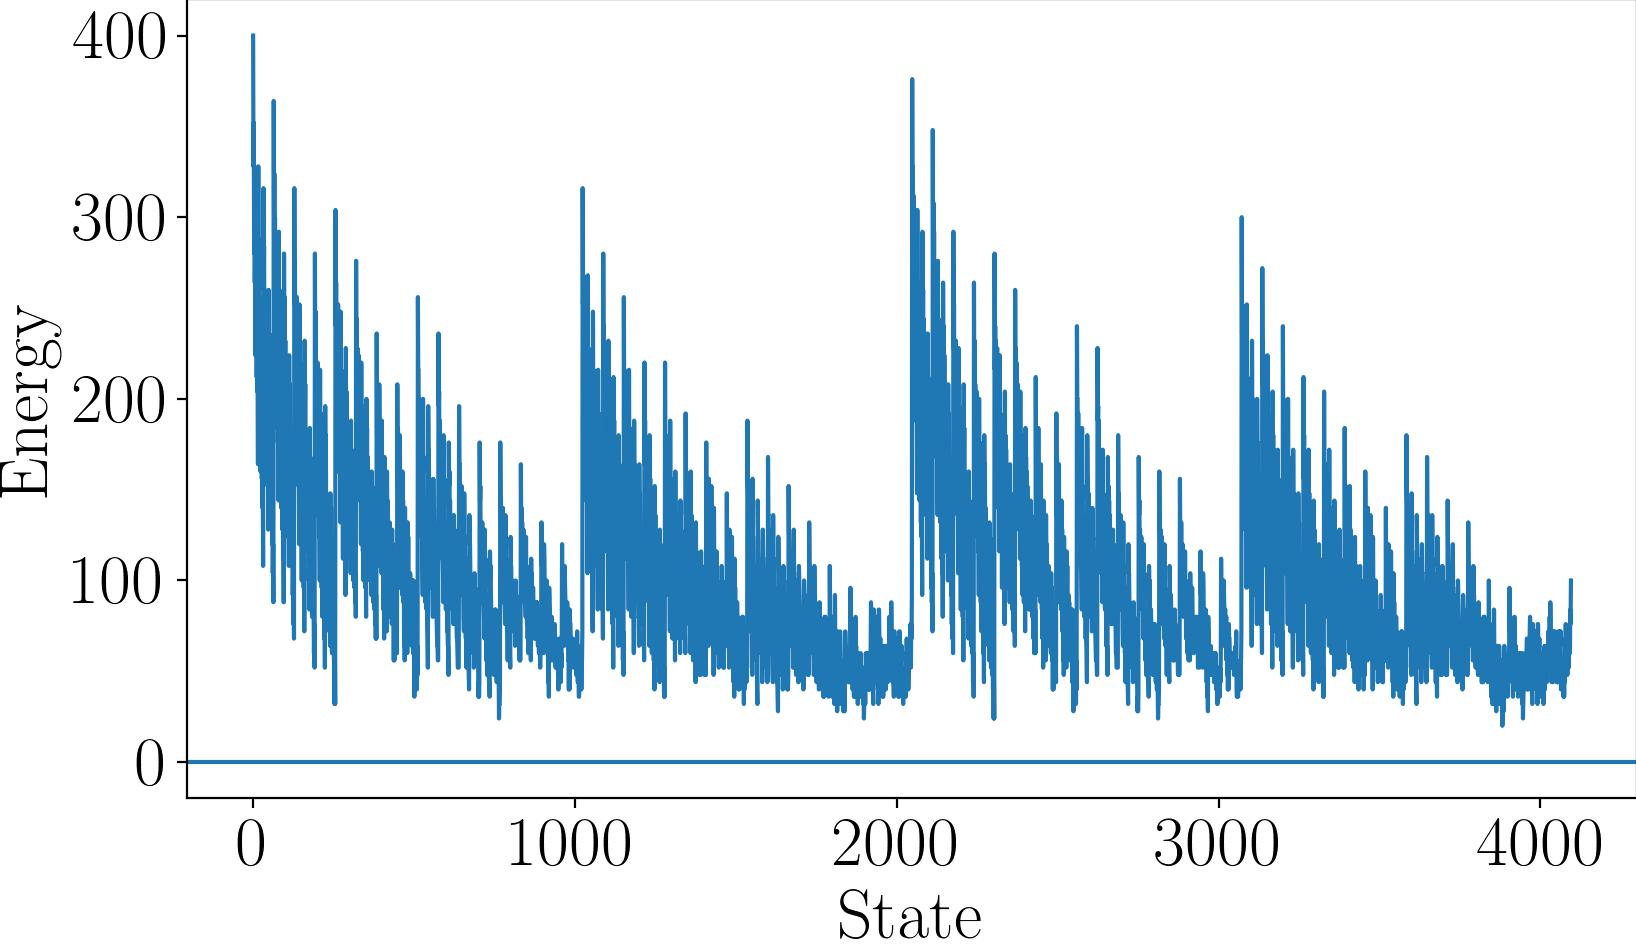

In [24]:
plt.plot(res['res_hamiltonian_diag'][2]);plt.axhline(0);
plt.xlabel('State');plt.ylabel('Energy');

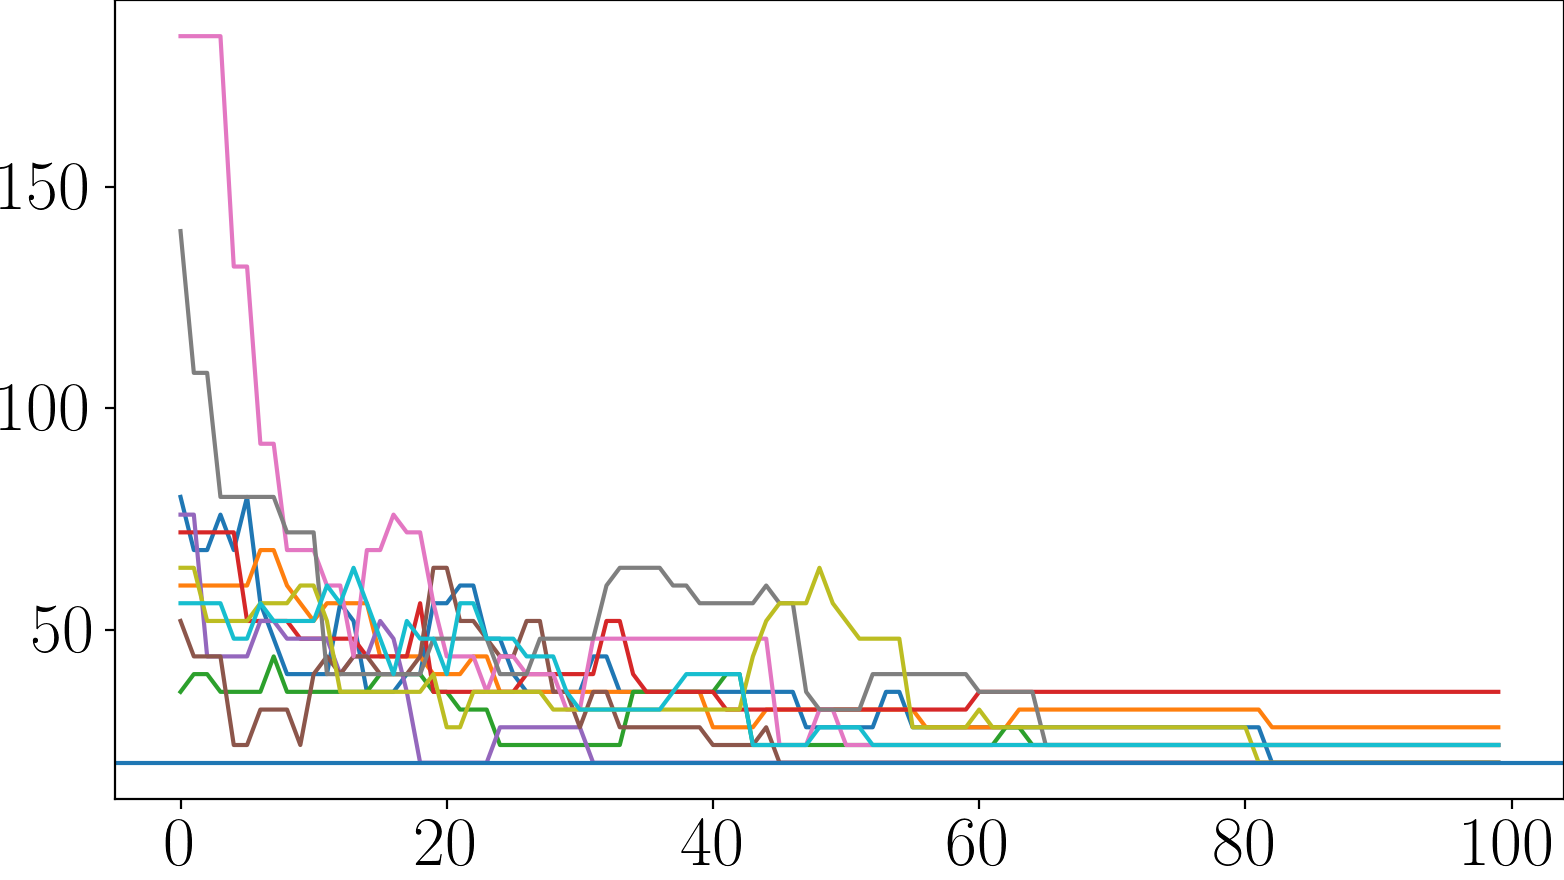

In [30]:
plt.plot(res['res_mc_timelines_energy'][i]);
plt.axhline(res['res_hamiltonian_diag'][i].min());

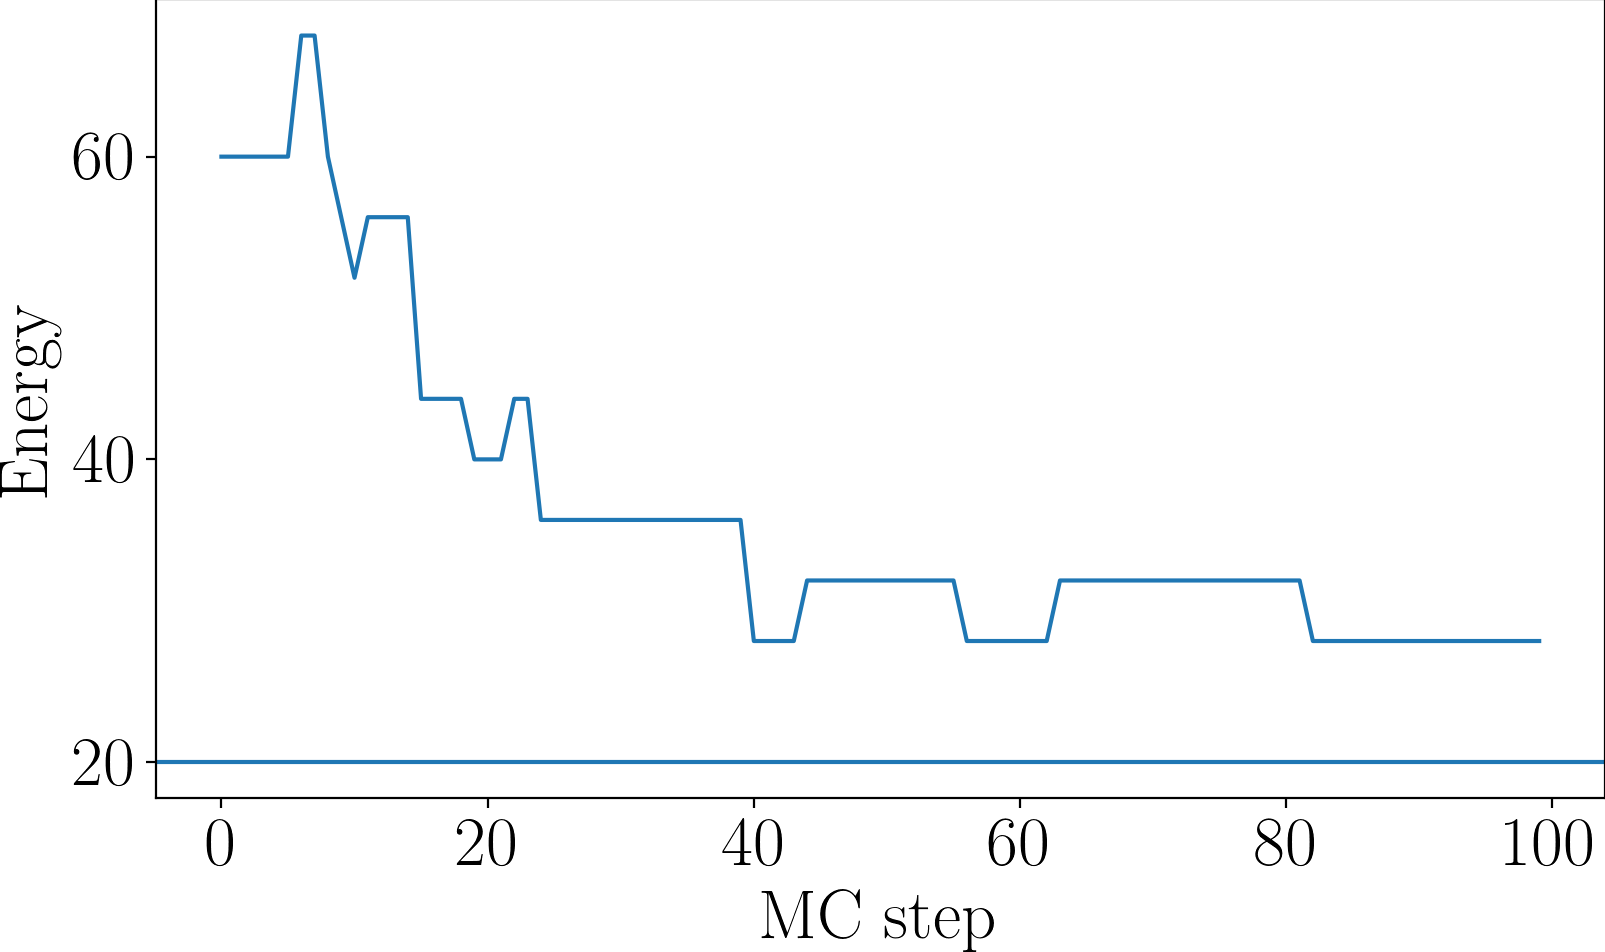

In [29]:
i=0; mc_i = 1
plt.plot(res['res_mc_timelines_energy'][i][:,mc_i]);
plt.axhline(res['res_hamiltonian_diag'][i].min());
plt.xlabel('MC step');plt.ylabel('Energy');

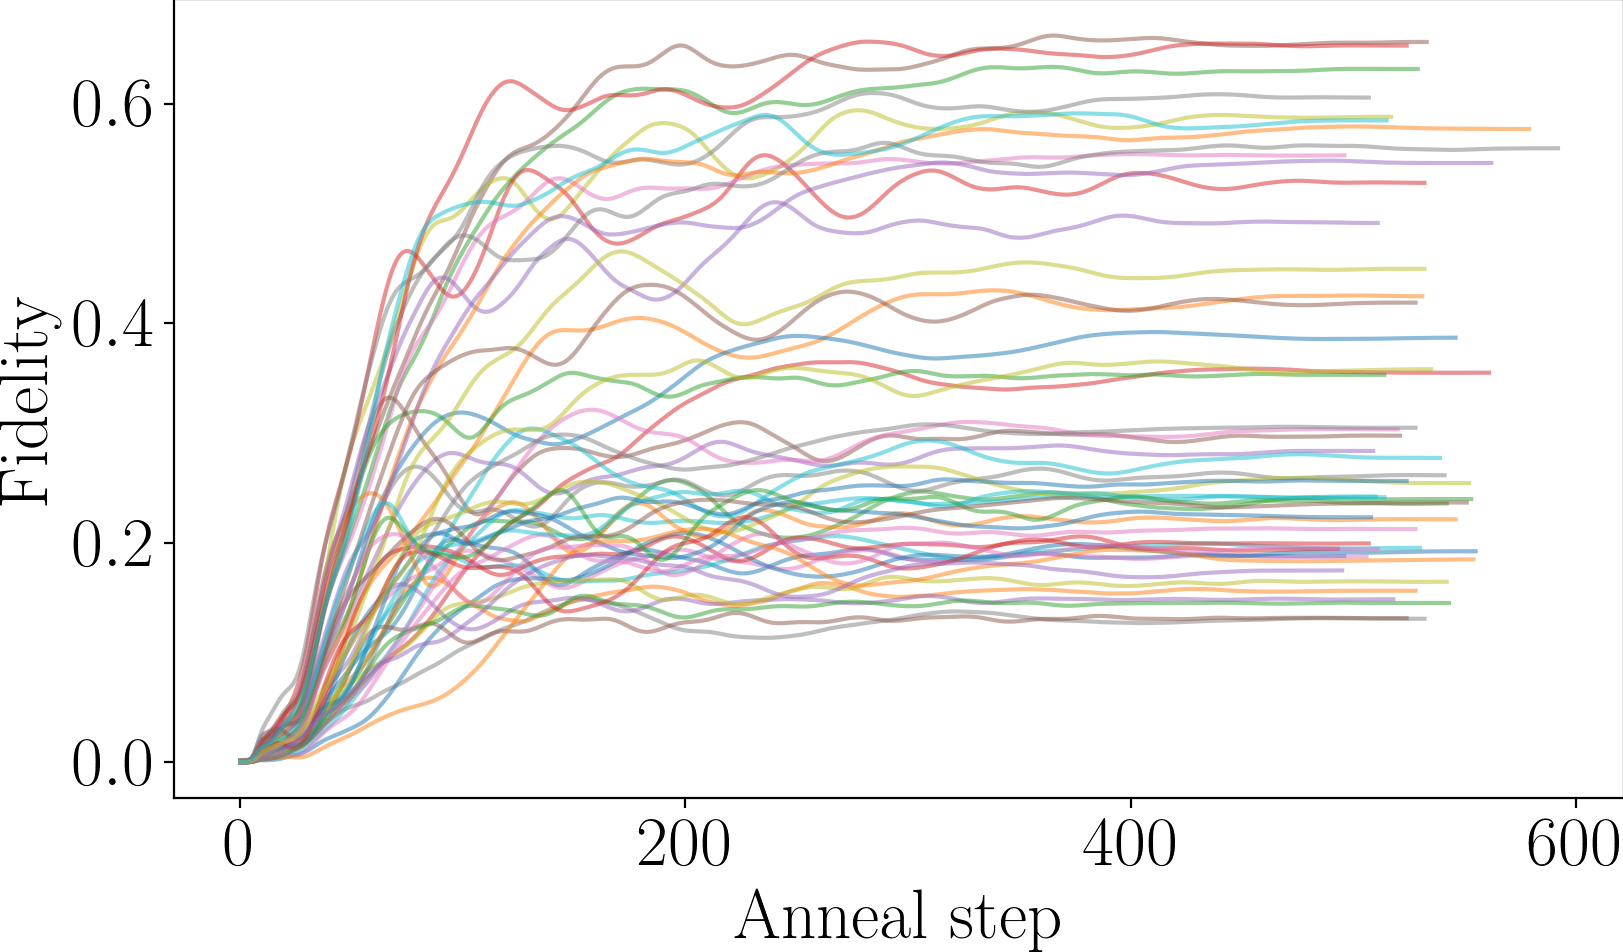

In [32]:
for i in range(min(len(res['res_fidelity']),50)):
    plt.plot(res['res_fidelity'][i], alpha=0.5); # res['res_fidelity'][i,0]
plt.xlabel('Anneal step');plt.ylabel('Fidelity');

# Fidelity distribution

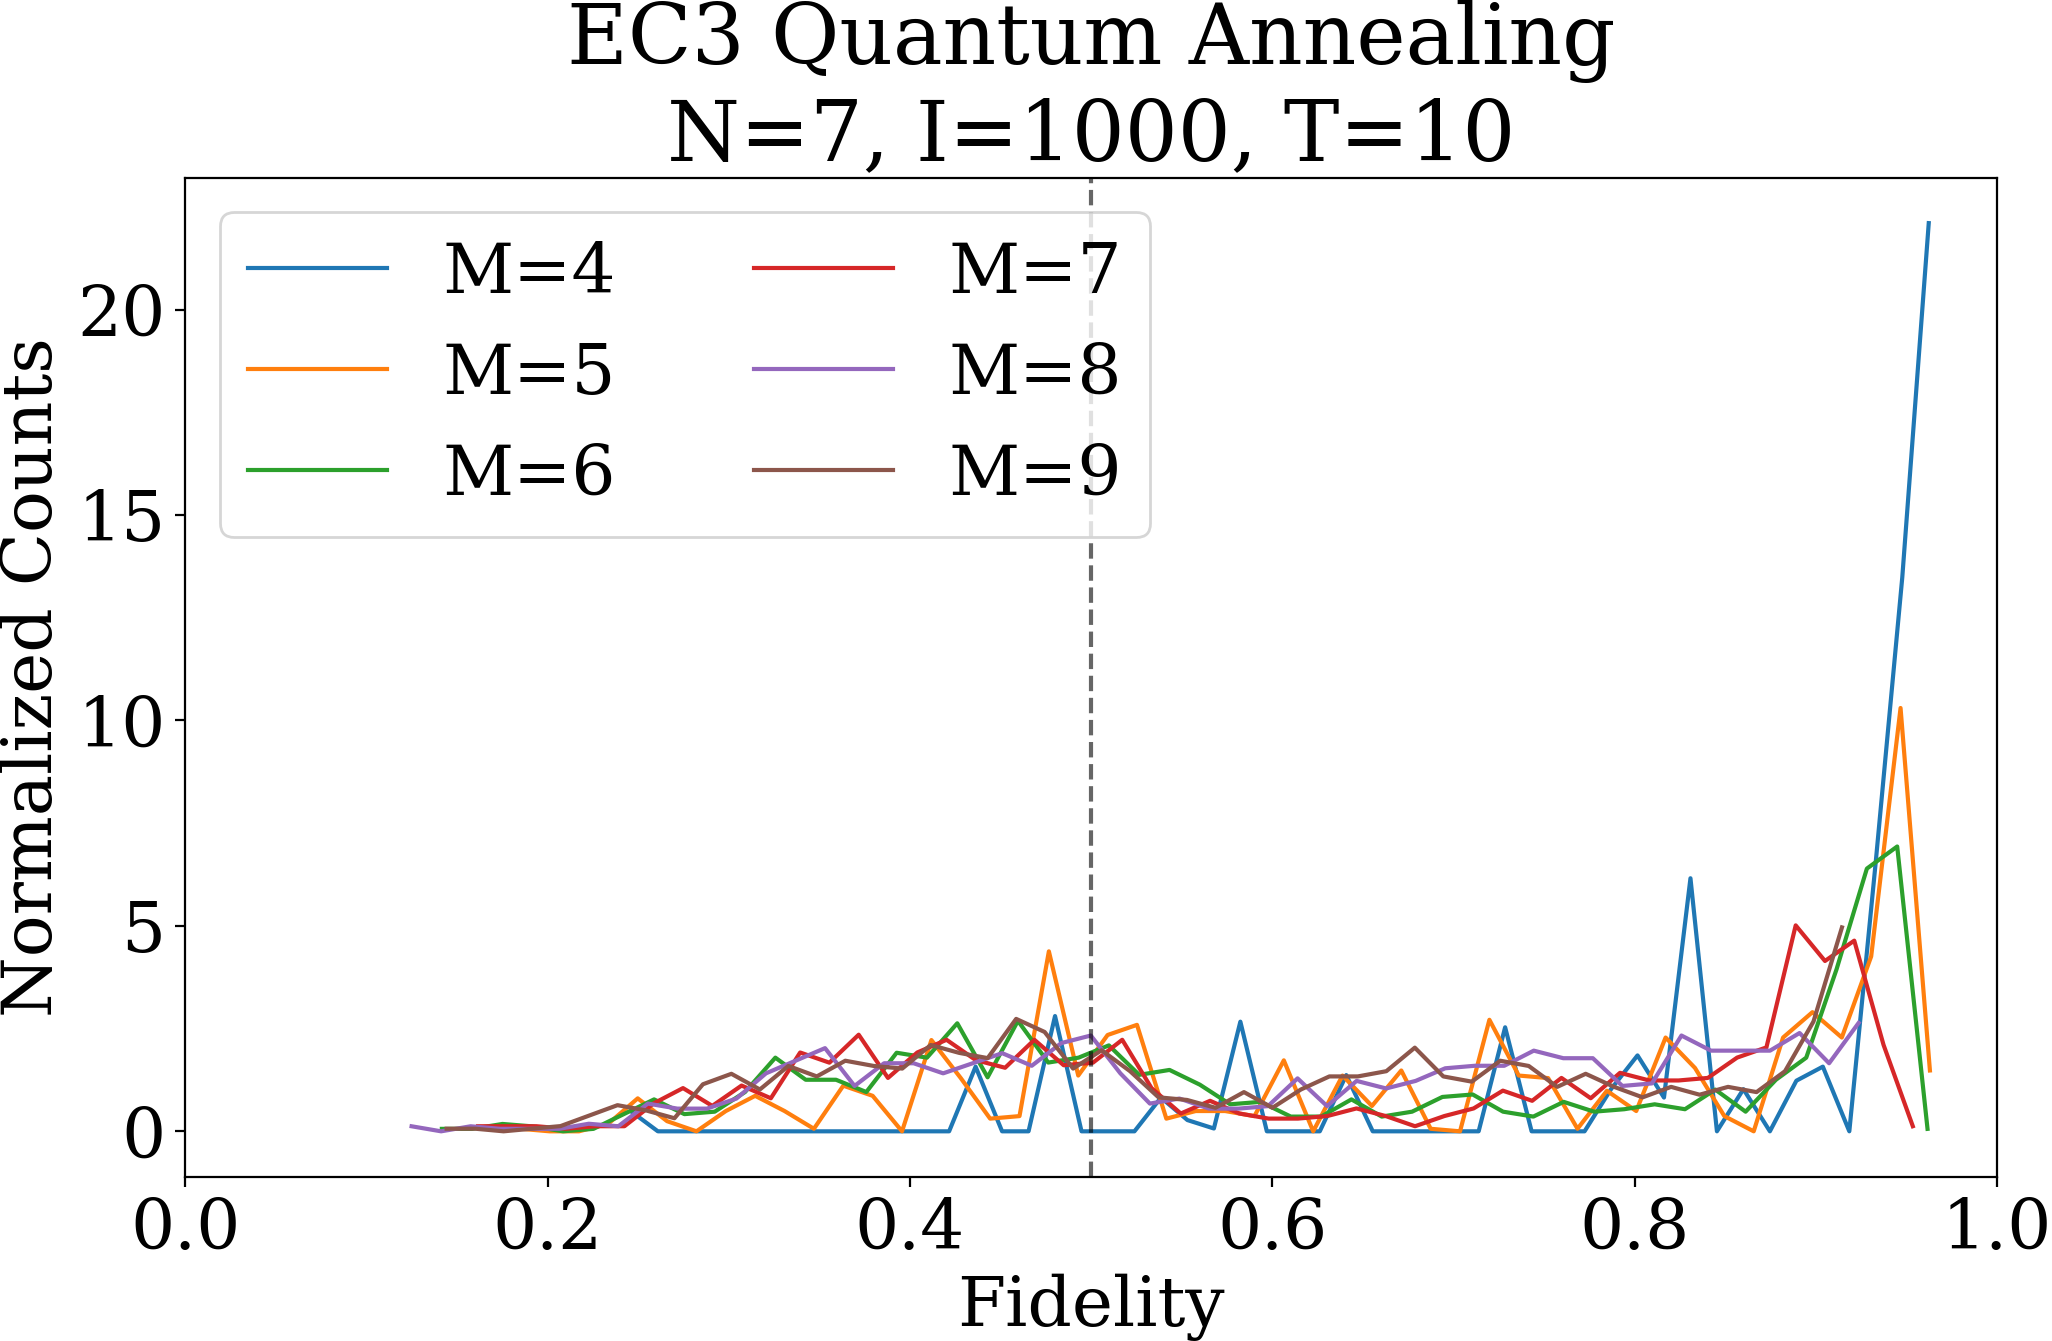

In [279]:
# xx = np.linspace(0, 1, 1000)
for num_clauses in [4,5,6,7,8 ,9]: #  ]:#
    data_args['num_clauses'] = num_clauses
    res = load_file(*[data_args[f'{arg}'] for arg in file_args], )
    # res = load_old()
    fid_end = np.array([f[1][-1] for f in res['res_fidelity']])#.round(1)
    # fid_end = np.array([f[-1] for f in res['res_fidelity']])#.round(1)
    # kde = stats.gaussian_kde(fid_end)
    # plt.plot(xx,kde(xx),label=f'M={data_args["num_clauses"]}');
    counts, binedges = np.histogram(fid_end,bins=50, density=True)
    bincenters = 0.5*(binedges[1:]+binedges[:-1])
    plt.plot(bincenters, counts,label=f'M={data_args["num_clauses"]}');
    # plt.hist(fid_end,50,density=True,histtype='step',label=f'M={data_args["num_clauses"]}');
plt.xlabel('Fidelity');plt.ylabel('Normalized Counts');
plt.xlim(0,1); plt.axvline(0.5, c='k', ls='--', alpha=0.6);
plt.legend(ncol=2, loc='upper left');#bbox_to_anchor = (1, 1));
plt.title('EC3 Quantum Annealing\n'
          f'N={data_args["num_spins"]}, I={data_args["num_instances"]}, T={data_args["anneal_T"]}');

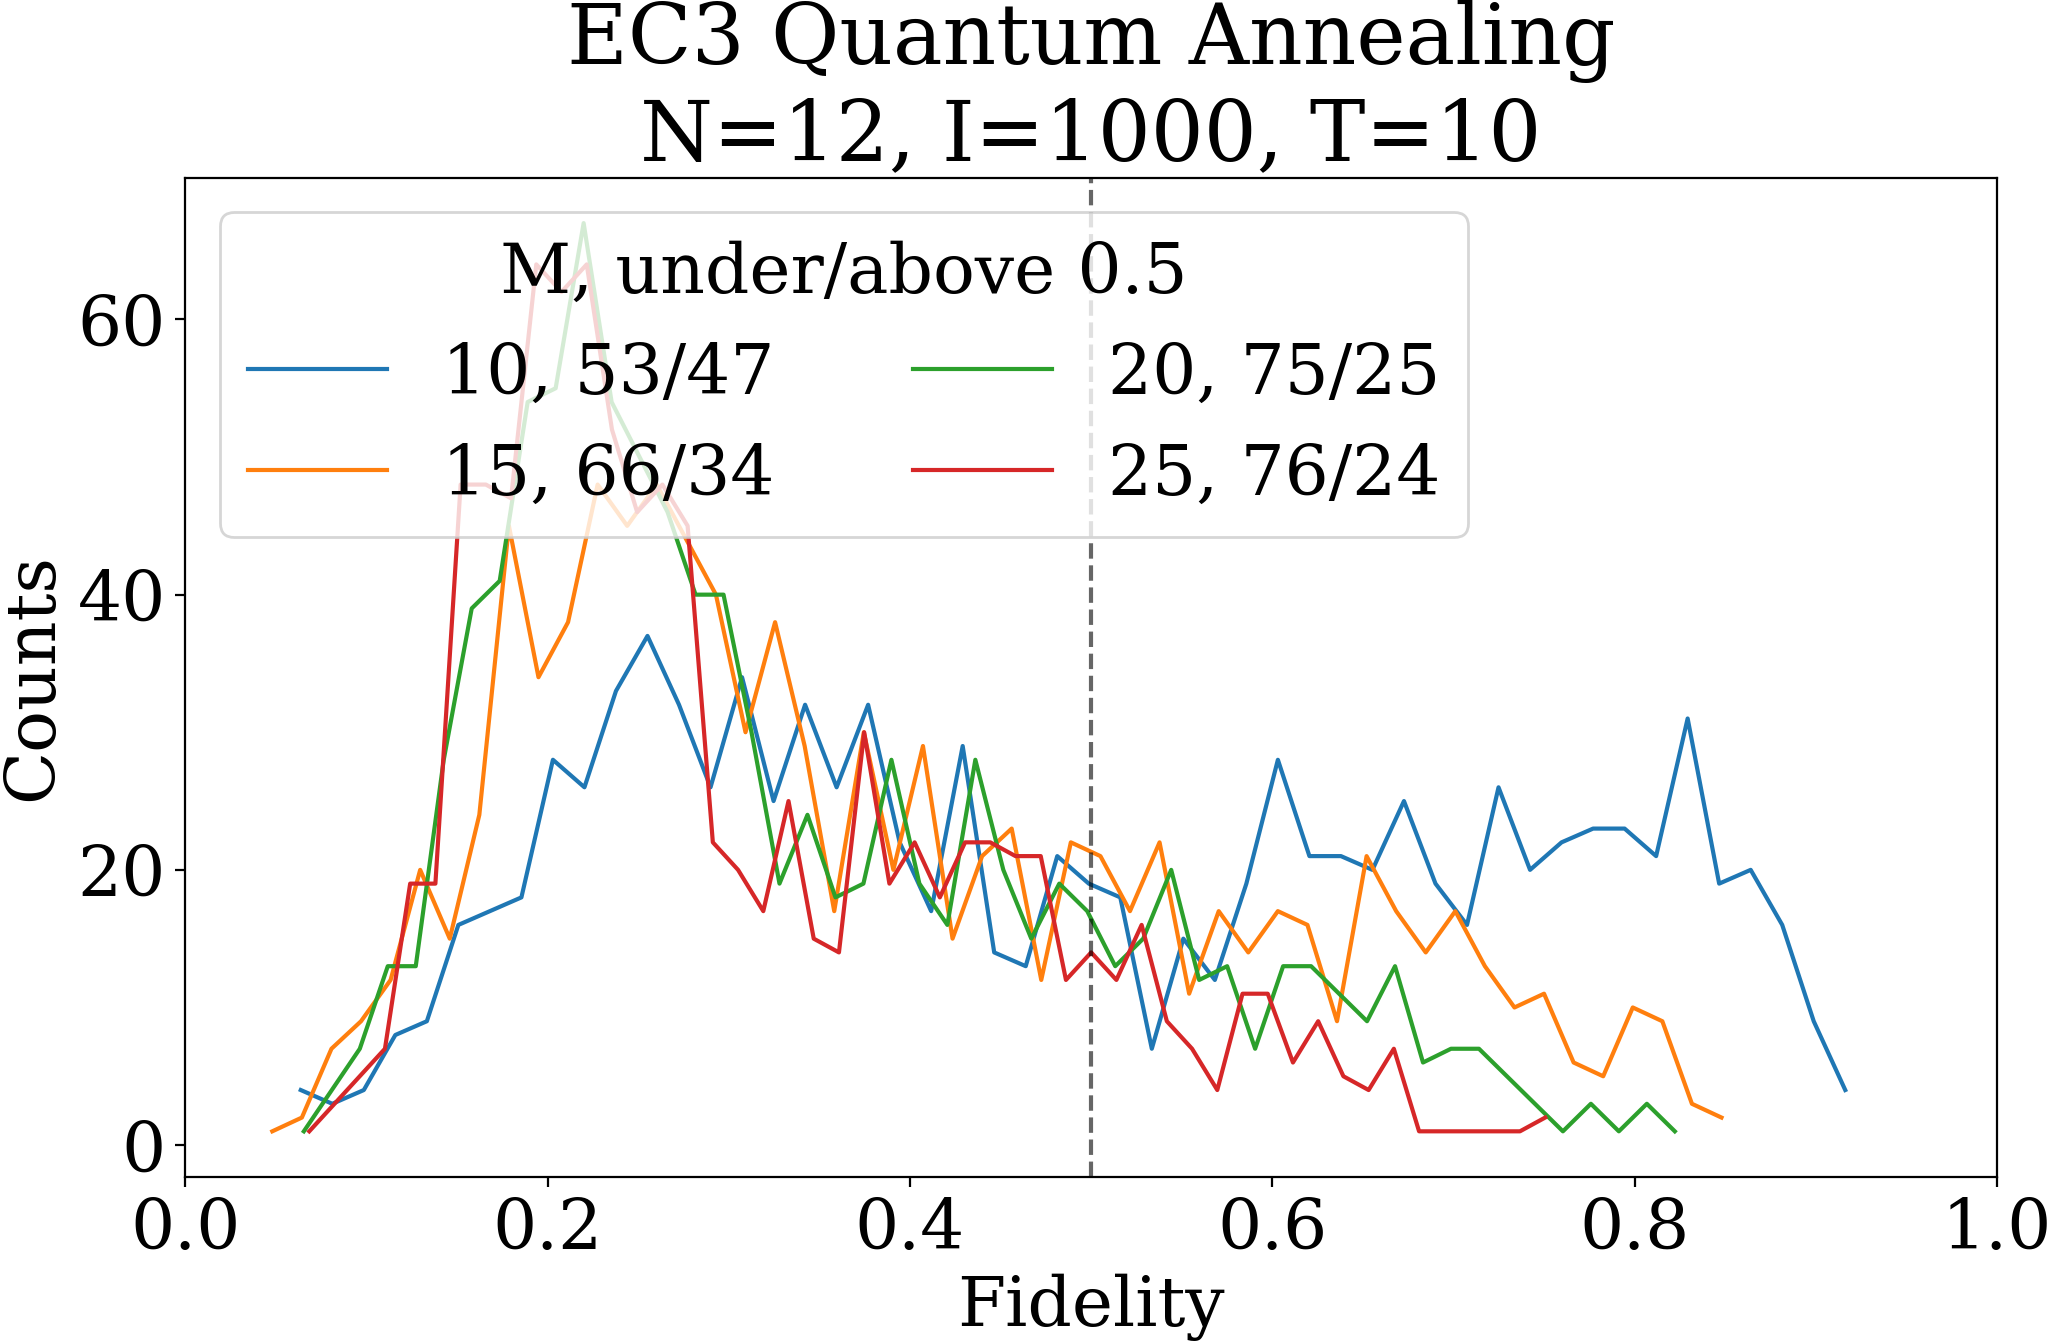

In [31]:
# fidelity under/above 0.5 and above 0.9
for num_clauses in [10,15,20,25]: #[4,5,6,7,8 ,9]: #  ]:#
    data_args['num_clauses'] = num_clauses
    res = load_file(*[data_args[f'{arg}'] for arg in file_args], )
    # res = load_old()
    # fid_end = np.array([f[1][-1] for f in res['res_fidelity']])#.round(1)
    fid_end = np.array([f[-1] for f in res['res_fidelity']])#.round(1)
    # kde = stats.gaussian_kde(fid_end)
    # plt.plot(xx,kde(xx),label=f'M={data_args["num_clauses"]}');
    num_bins = 50
    counts, binedges = np.histogram(fid_end,bins=num_bins)
    fid_ratio_pct = counts[:num_bins//2].sum()/fid_end.shape[0]*100
    bincenters = 0.5*(binedges[1:]+binedges[:-1])
    plt.plot(bincenters, counts,label=f'{data_args["num_clauses"]}, {fid_ratio_pct:.0f}/{100-fid_ratio_pct:.0f}'
                                        # f', {counts[-10:].sum()/fid_end.shape[0]*100:.0f}'
            );
    # plt.hist(fid_end,50,density=True,histtype='step',label=f'M={data_args["num_clauses"]}');
plt.xlabel('Fidelity');plt.ylabel('Counts');
plt.xlim(0,1); plt.axvline(0.5, c='k', ls='--', alpha=0.6);
plt.legend(ncol=2, loc='upper left', title='M, under/above 0.5');  # , above 0.9');#bbox_to_anchor = (1, 1));
plt.title('EC3 Quantum Annealing\n'
          f'N={data_args["num_spins"]}, I={data_args["num_instances"]}, T={data_args["anneal_T"]}');

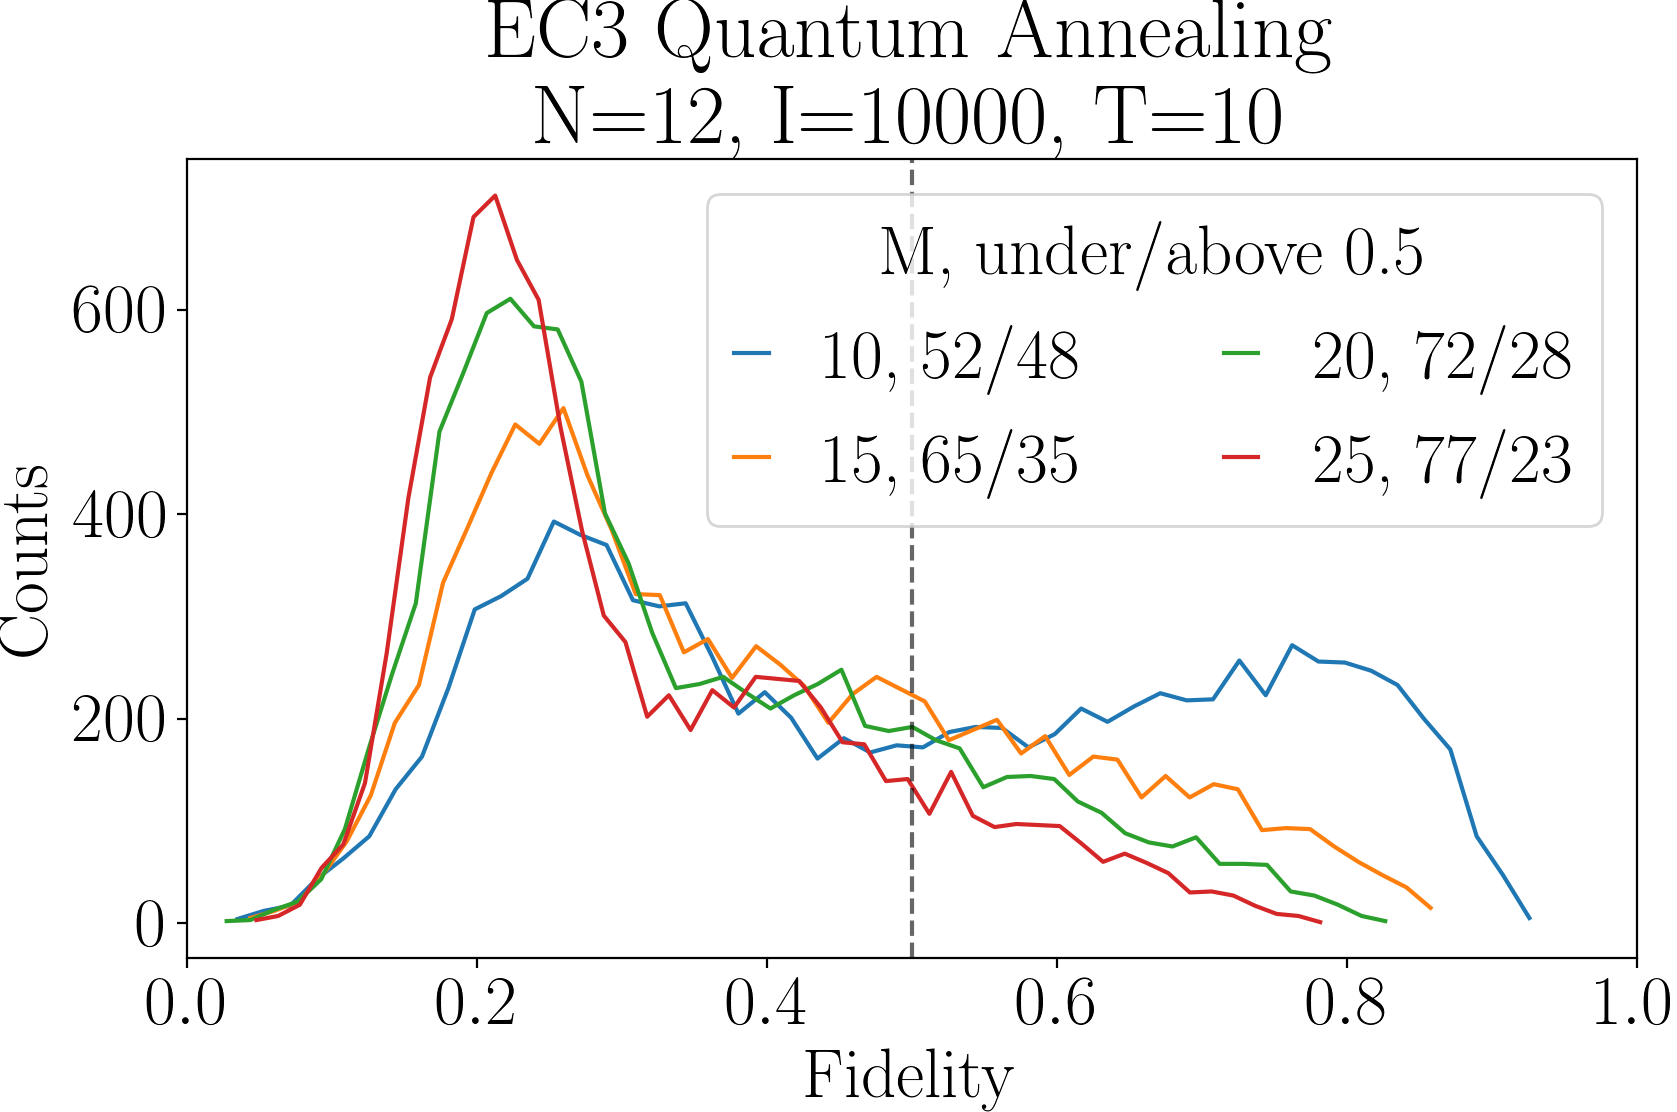

In [35]:
# fidelity under/above 0.5 and above 0.9
for num_clauses in [10,15,20,25]: #[4,5,6,7,8 ,9]: #  ]:#
    data_args['num_clauses'] = num_clauses
    res = load_file(*[data_args[f'{arg}'] for arg in file_args], )
    # res = load_old()
    # fid_end = np.array([f[1][-1] for f in res['res_fidelity']])#.round(1)
    fid_end = np.array([f[-1] for f in res['res_fidelity']])#.round(1)
    # kde = stats.gaussian_kde(fid_end)
    # plt.plot(xx,kde(xx),label=f'M={data_args["num_clauses"]}');
    num_bins = 50
    counts, binedges = np.histogram(fid_end,bins=num_bins)
    fid_ratio_pct = counts[:num_bins//2].sum()/fid_end.shape[0]*100
    bincenters = 0.5*(binedges[1:]+binedges[:-1])
    plt.plot(bincenters, counts,label=f'{data_args["num_clauses"]}, {fid_ratio_pct:.0f}/{100-fid_ratio_pct:.0f}'
                                        # f', {counts[-10:].sum()/fid_end.shape[0]*100:.0f}'
            );
    # plt.hist(fid_end,50,density=True,histtype='step',label=f'M={data_args["num_clauses"]}');
plt.xlabel('Fidelity');plt.ylabel('Counts');
plt.xlim(0,1); plt.axvline(0.5, c='k', ls='--', alpha=0.6);
plt.legend(ncol=2, loc='best', title='M, under/above 0.5', handlelength=0.5);  # , above 0.9');#bbox_to_anchor = (1, 1));
plt.title('EC3 Quantum Annealing\n'
          f'N={data_args["num_spins"]}, I={data_args["num_instances"]}, T={data_args["anneal_T"]}');

In [38]:
from scipy import stats
kde = stats.gaussian_kde(fid_end)
xx = np.linspace(0, 1, 1000)

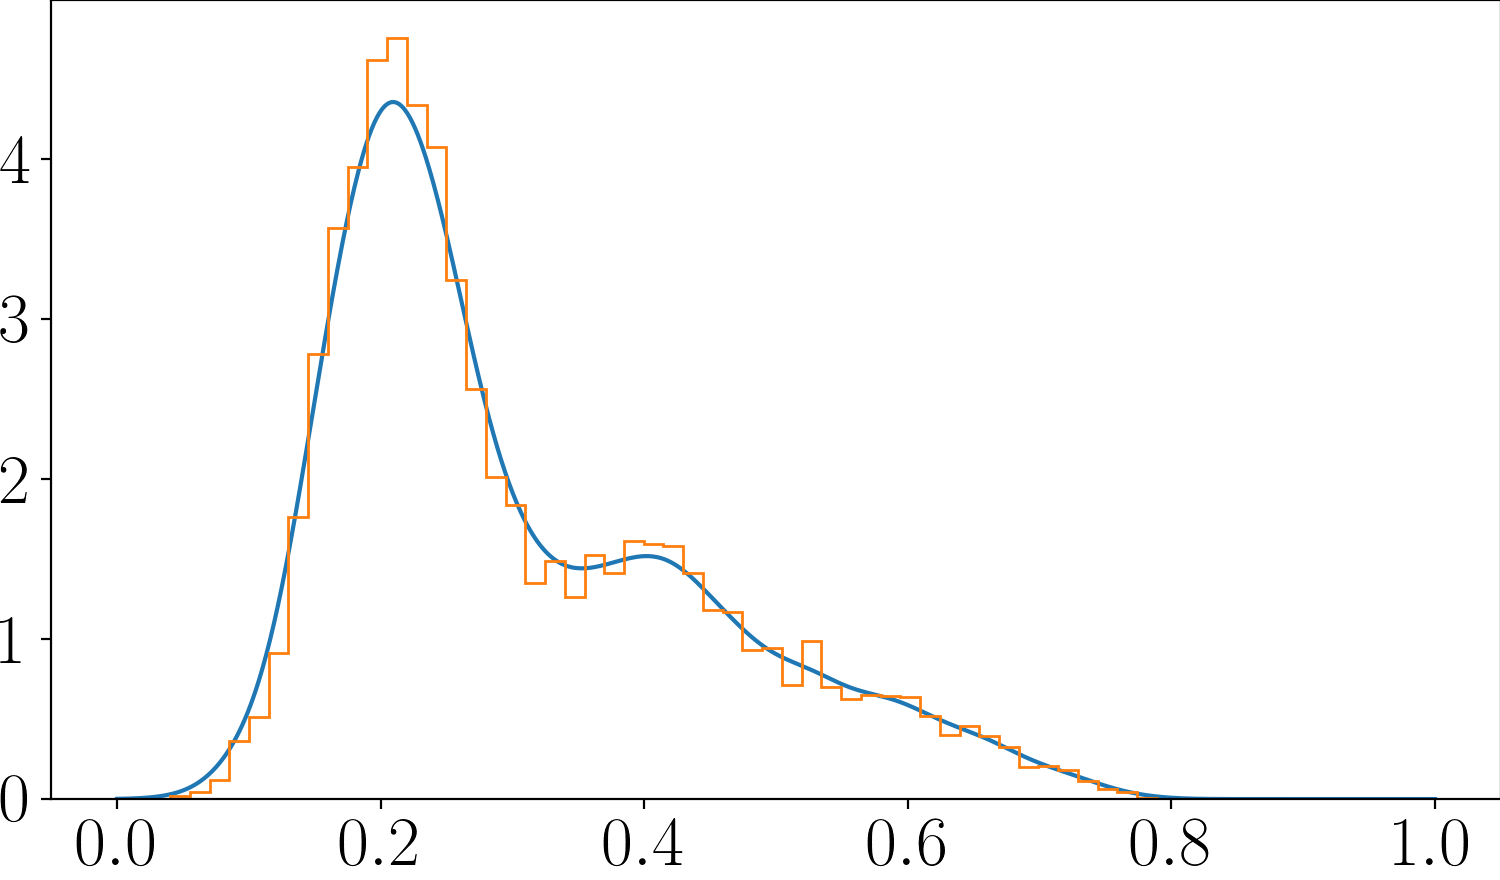

In [39]:
plt.plot(xx,kde(xx));
plt.hist(fid_end,50, density=True, histtype='step');

# GS degeneracy distribution

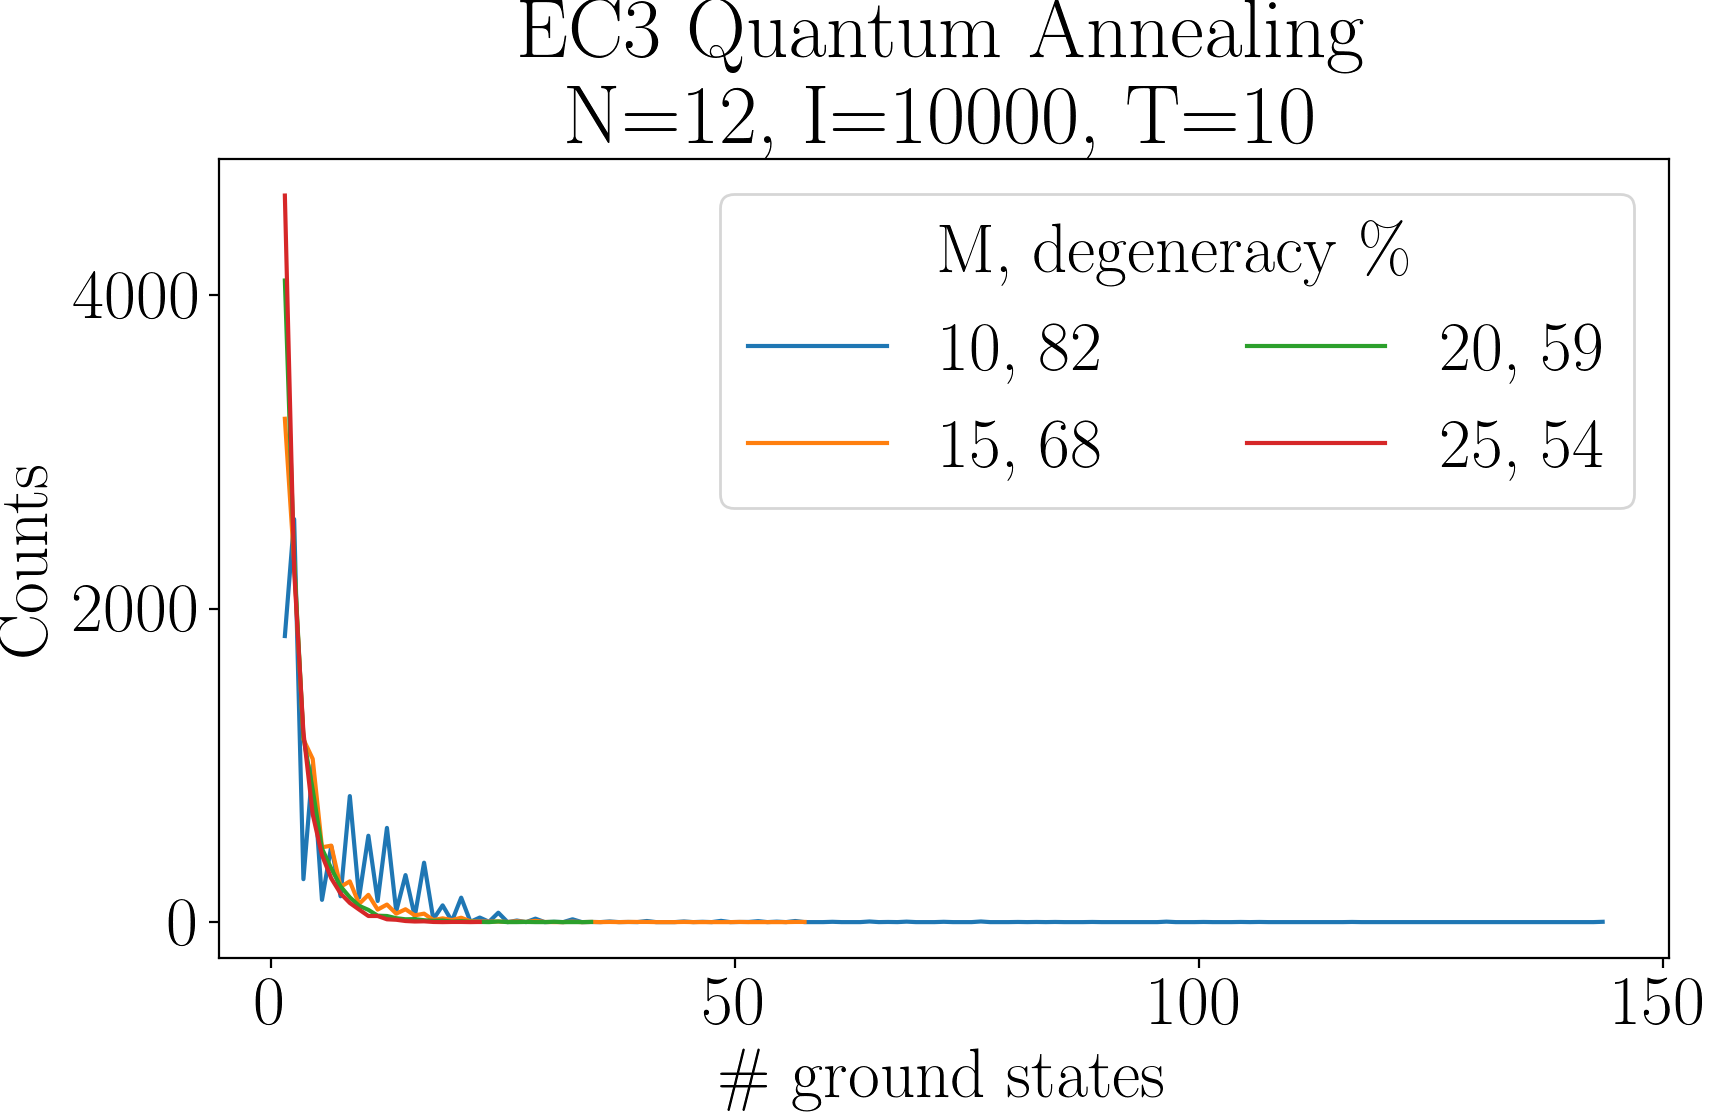

In [22]:
# count how many instances have deg. GS for each M
for num_clauses in  [10,15,20,25]:#[10,11,12,13]:
    data_args['num_clauses'] = num_clauses
    res = load_file(*[data_args[f'{arg}'] for arg in file_args], )  # I, 2**N
    gs_energies = np.min(res['res_hamiltonian_diag'], axis=-1, keepdims=True)  # I
    gs_ = res['res_hamiltonian_diag'] == gs_energies.repeat(res['res_hamiltonian_diag'].shape[-1], axis=-1)  # I; 2**N

    count_gs = np.sum(gs_,axis=-1)  # I
    count_gs_max = count_gs.max()

    # plt.hist(count_gs, count_gs_max-1, log=True, label=f'M={data_args["num_clauses"]}');
    counts, binedges = np.histogram(count_gs,bins=count_gs_max-1)
    gs_deg_ratio = 1-counts[0]/res['res_hamiltonian_diag'].shape[0] # counts[1:].sum()/ all_instances
    bincenters = 0.5*(binedges[1:]+binedges[:-1])
    plt.plot(bincenters, counts,label=f'{data_args["num_clauses"]}, {gs_deg_ratio:.0%}');
# fig = plt.gcf()

plt.xlabel(r'\# ground states');plt.ylabel('Counts');
plt.legend(ncol=2, loc='best', title='M, degeneracy \%');#bbox_to_anchor = (1, 1));
plt.title('EC3 Quantum Annealing\n'
          f'N={data_args["num_spins"]}, I={data_args["num_instances"]}, T={data_args["anneal_T"]}');

# Fidelity distribution for unique GS

In [40]:
gs_energies = np.min(res['res_hamiltonian_diag'], axis=-1, keepdims=True)  # I
gs_ = res['res_hamiltonian_diag'] == gs_energies.repeat(res['res_hamiltonian_diag'].shape[-1], axis=-1)  # I; 2**N
count_gs = np.sum(gs_,axis=-1)  # I

# unique GS
gs_unique_mask = count_gs==1

res['res_hamiltonian_diag'][gs_unique_mask].shape

(4635, 4096)

In [41]:
# fid_end = np.array([f[1][-1] for f in res['res_fidelity'][gs_unique_mask]])
fid_end = np.array([f[-1] for f in res['res_fidelity'][gs_unique_mask]])
fid_end.shape

(4635,)

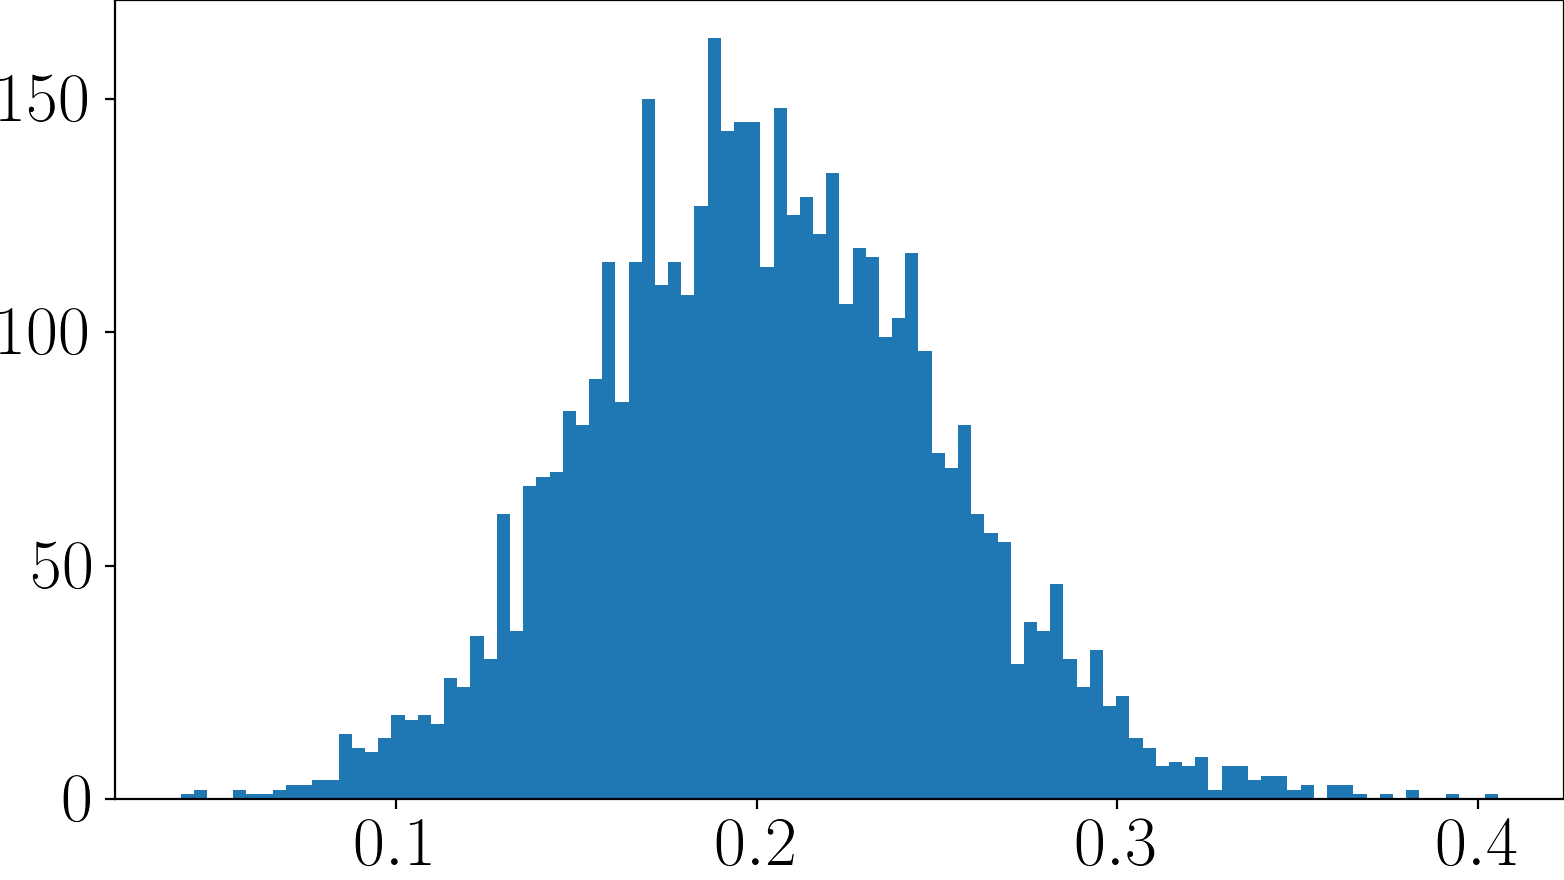

In [43]:
plt.hist(fid_end, bins=100);

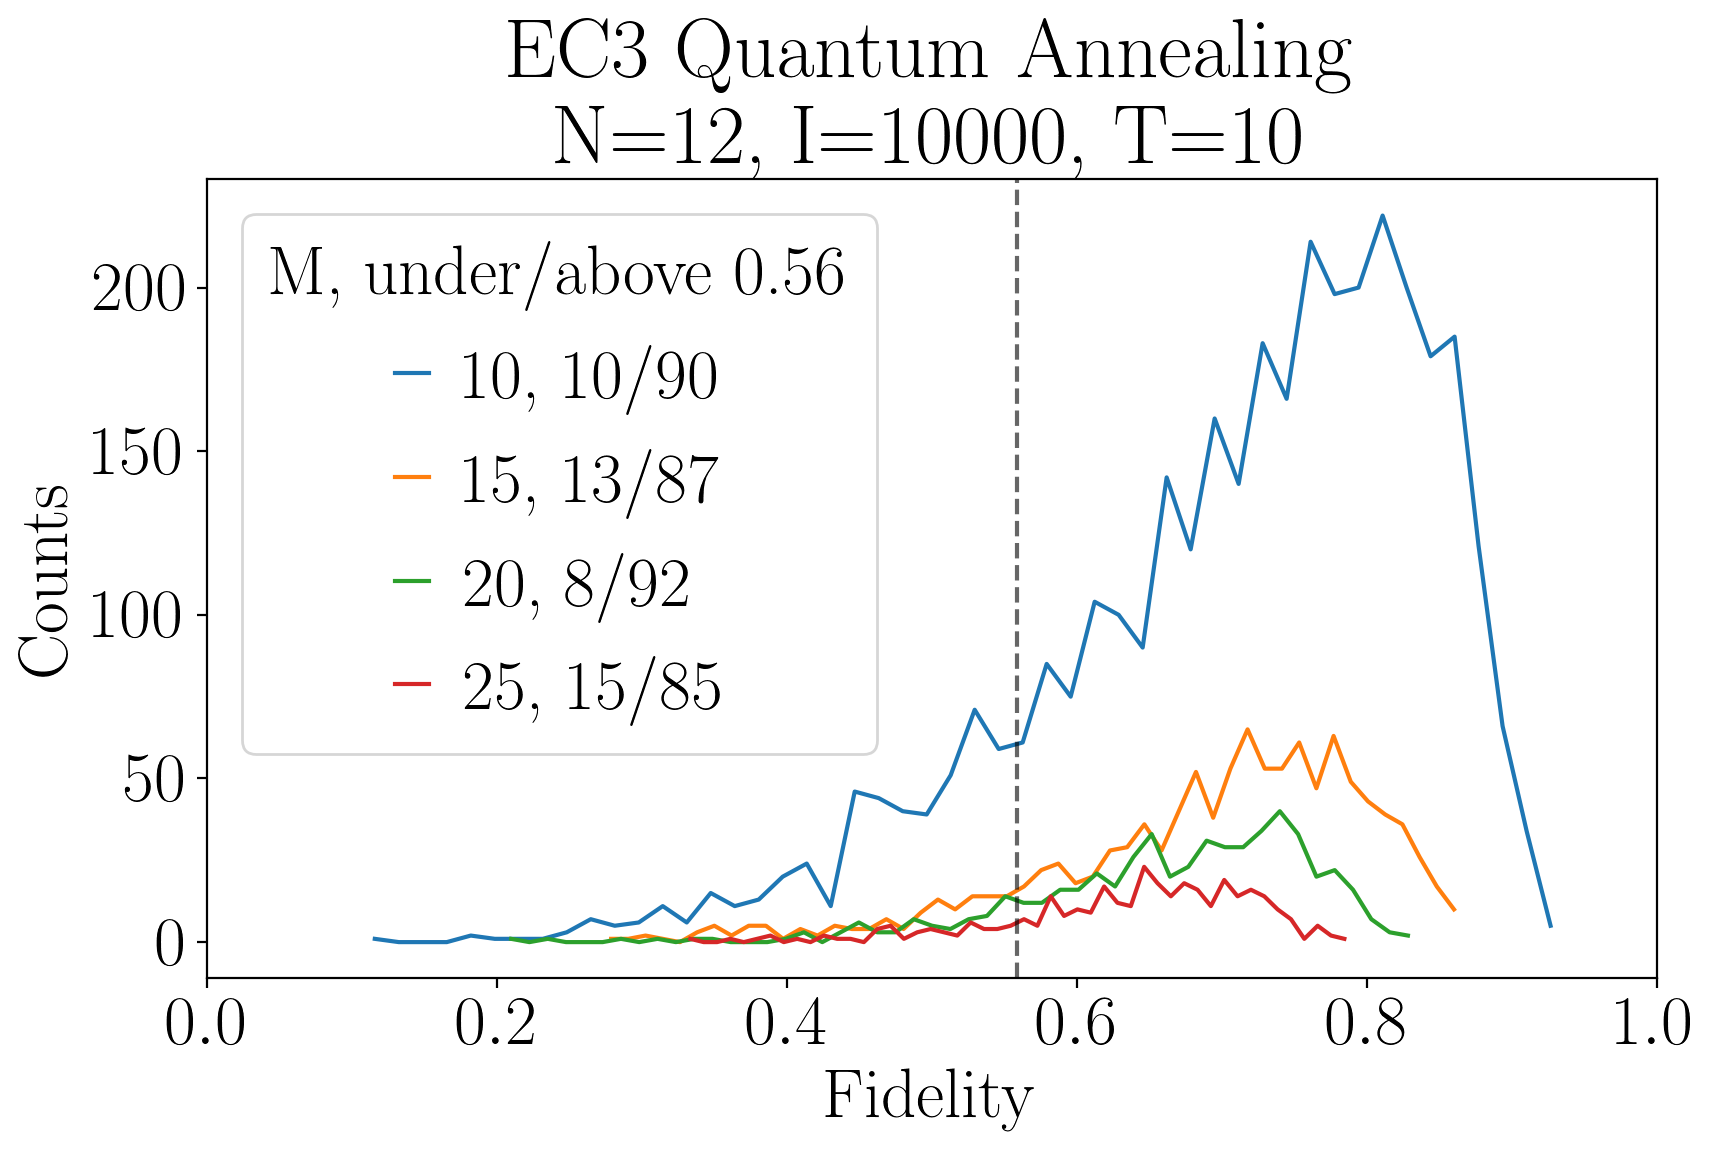

In [250]:
# fidelity under/above 0.5 and above 0.9
for num_clauses in [10,15,20,25]:#[6,7,8 ,9]: #  ]:#
    data_args['num_clauses'] = num_clauses
    res = load_file(*[data_args[f'{arg}'] for arg in file_args], )
    # unique GS %%%%%%%%%%%%%%%%%%%%%%%5
    gs_energies = np.min(res['res_hamiltonian_diag'], axis=-1, keepdims=True)  # I
    gs_ = res['res_hamiltonian_diag'] == gs_energies.repeat(res['res_hamiltonian_diag'].shape[-1], axis=-1)  # I; 2**N
    count_gs = np.sum(gs_,axis=-1)  # I
    # unique GS
    gs_unique_mask = count_gs>7 # 6
    ####################################################

    # res = load_old()
    # fid_end = np.array([f[1][-1] for f in res['res_fidelity'][gs_unique_mask]])#.round(1)
    fid_end = np.array([f[-1] for f in res['res_fidelity'][gs_unique_mask]])#.round(1)
    # kde = stats.gaussian_kde(fid_end)
    # plt.plot(xx,kde(xx),label=f'M={data_args["num_clauses"]}');
    num_bins = 50
    counts, binedges = np.histogram(fid_end,bins=num_bins)
    fid_ratio_pct = counts[:num_bins//2].sum()/fid_end.shape[0]*100
    bincenters = 0.5*(binedges[1:]+binedges[:-1])
    plt.plot(bincenters, counts,label=f'{data_args["num_clauses"]}, {fid_ratio_pct:.0f}/{100-fid_ratio_pct:.0f}'
                                        # f', {counts[-10:].sum()/fid_end.shape[0]*100:.0f}'
            );
    # plt.hist(fid_end,50,density=True,histtype='step',label=f'M={data_args["num_clauses"]}');
plt.xlabel('Fidelity');plt.ylabel('Counts');
plt.xlim(0,1); plt.axvline(binedges[num_bins//2], c='k', ls='--', alpha=0.6);
plt.legend(#ncol=2,
           loc='best', title=f'M, under/above {binedges[num_bins//2]:.2f}');  # , above 0.9');#bbox_to_anchor = (1, 1));
plt.title('EC3 Quantum Annealing\n'
          f'N={data_args["num_spins"]}, I={data_args["num_instances"]}, T={data_args["anneal_T"]}');

# Correlation between simulated annealing MC Energies simple metrics and quantum annealing Fidelity

## Hist2d with marginals

In [351]:
def hist2d_marginals(x,y, bins=30,
                     cmin=1, norm=None, colors_num=1, cb_loc=2,
                     xlabel='',ylabel='', title='', log=(False, False)):
    if not isinstance(log, tuple): log = (log,log)
    rows = 8; columns = 8;
    if isinstance(bins,tuple):
        bins_x, bins_y = *bins,
    else:
        bins_x = bins_y = bins
    grid = plt.GridSpec(rows, columns, wspace=.01, hspace=.01)
    plt.suptitle(title);

    # upper hist
    ax1 = plt.subplot(grid[0, 0:-1], frameon=False)
    h1 = plt.hist(x, bins = bins_x,alpha=.4, log=log[0])
    plt.xlim(h1[1][0],h1[1][-1])
    plt.tick_params(labelleft=False, left=False,
                    labelbottom=False, bottom=False)

    # central hist2d #######################################3
    ax2 = plt.subplot(grid[1:rows+1, 0:-1])
    # define the bins and normalize
    h2 = plt.hist2d(x, y, bins=bins, cmin=cmin, norm=norm)
    if colors_num>1:
        bounds = np.linspace(np.nanmin(h2[0]),np.nanmax(h2[0]),colors_num+1)
        # bounds = np.nanpercentile(h2[0], np.linspace(0,100,colors_num+1))
        norm2 = mpl.colors.BoundaryNorm(bounds, plt.get_cmap().N)
        h2 = plt.hist2d(x, y, bins=bins, cmin=cmin, norm=norm2)
    plt.xlabel(xlabel);plt.ylabel(ylabel, rotation=0, ha='right');
    # set number of ticks 
    # plt.locator_params(nbins=4)
    # plt.axis('equal')
    ax2.spines[:].set_alpha(0.2) #visible(False)
    
    # inset colorbar
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    colorbar_axis = inset_axes(ax2, width="5%", height="50%",loc=cb_loc,
                               borderpad=0.1);
    colorbar_axis.yaxis.set_tick_params(direction = 'in')
    plt.colorbar(cax=colorbar_axis)
    if norm is None:
        plt.locator_params(nbins=2)
        colorbar_axis.yaxis.set_major_locator(plt.MaxNLocator(3, integer=True))
    colorbar_axis.spines[:].set_visible(False)
    # colorbar_axis.yaxis.set_ticks_position("left");
    # plt.tick_params(labelleft=False, left=False)
    #############################################################
    
    # right hist
    ax3 = plt.subplot(grid[1:rows+1, -1], frameon=False)
    h3 = plt.hist(y, bins = bins_y, orientation='horizontal', alpha = .4, log=log[1]);
    plt.ylim(h3[1][0],h3[1][-1])
    ax3.yaxis.tick_right()
    plt.tick_params(labelright=False, right=False,
                    labelbottom=False, bottom=False);

    # correlation coefficients
    # print(np.corrcoef(x,y,rowvar=False))
    from scipy.stats import pearsonr, spearmanr

    # Apply the pearsonr()
    pearson_corr, pearson_pvalue = pearsonr(x, y)
    print(f'Pearsons correlation: \(r={pearson_corr}, p={pearson_pvalue}\)')
    spearman_corr, spearman_pvalue = spearmanr(x, y)
    print(f'Spearman correlation: \(r_s={spearman_corr}, p={spearman_pvalue}\)')
    corr_text = '\(r_{\phantom{s}}=' f'{pearson_corr:.2g}, p={pearson_pvalue:.1g}' r'\)'\
             '\n'\
             '\(r_s=' f'{spearman_corr:.2g}, p={spearman_pvalue:.1g}' r'\)'
    # upper right corner
    # ax1.text(1,0.2,corr_text, transform=ax1.transAxes,)
    # lower left corner
    # ax2.text(-0.4,-0.3,corr_text, transform=ax2.transAxes,)
    # upper left corner 
    ax2.text(-0.4,1.1,corr_text,transform=ax2.transAxes,)
    return plt.gcf(), h2

In [205]:
#export
def bin_data(x,y,bins_num=50, points=100, xscale="log"):
    """Takes an x-axis-parallel rectangle in the histogram,
       that is cherry picking to get a uniform distribution in x axis."""
    if xscale in ["lin", "linear"]:
        min_val = np.min(x)
        max_val = np.max(x)
        bins = np.linspace(min_val,max_val, bins_num)
    elif xscale in ["log", 'logarithmic']:
        min_val = np.min(x[np.nonzero(x)]) # Geometric sequence cannot include zero
        max_val = np.max(x[np.nonzero(x)])
        bins = np.geomspace(min_val,max_val, bins_num) # np.logspace(min_exp,max_exp, 100)
#         bins = np.append(0, bins) # add the 0 to the bins
        # minimal exponent avoiding 0
            # min_val = np.min(x[np.nonzero(x)])
            # min_exp = np.log10(min_val)
            # max_exp = np.log10(max_val)
            # # round to cover the range
            # min_exp = np.floor(min_exp)
            # max_exp = np.ceil(max_exp)
    elif xscale in ["symlog"]:
        min_val = np.min(np.abs(x[np.nonzero(x)]))
        max_val = np.max(np.abs(x[np.nonzero(x)]))
        # positive branch
        bins_num_p = int(np.floor(bins_num/2) -1)
        bins_p = np.geomspace(min_val,max_val, bins_num_p) # np.logspace(min_exp,max_exp, 100)
        bins_n = -bins_p[::-1] # -np.geomspace(max_val,min_val, bins_num_p)
        bins = np.append([-min_val/2,0,min_val/2], bins_p) # add the 0 to the bins
        bins = np.append(bins_n, bins)
    else:
        raise NotImplementedError(f"{xscale=} not implemented")
    # digitize: put data into the baskets (bins) using the indexes
    x_bin_idx = np.digitize(x, bins)
    x_bin = [x[x_bin_idx == i] for i in range(bins_num)]
    y_bin = [y[x_bin_idx == i] for i in range(bins_num)]

    bin_uniform_idx = []
    x_bin_uniform = []
    y_bin_uniform = []
    idx_rand = np.arange(points)  # 
    for i, (a,b) in enumerate(zip(x_bin, y_bin)):
        if len(a)>=points:
            bin_uniform_idx.append(i)
            x_bin_uniform.append(a[idx_rand])
            y_bin_uniform.append(b[idx_rand])
    x_bin_uniform = np.array(x_bin_uniform)
    y_bin_uniform = np.array(y_bin_uniform)

    return x_bin_uniform, y_bin_uniform, bins, bin_uniform_idx

Pearsons correlation: \(r=-0.7867885723814958, p=0.0\)
Spearman correlation: \(r_s=-0.7850336123183361, p=0.0\)


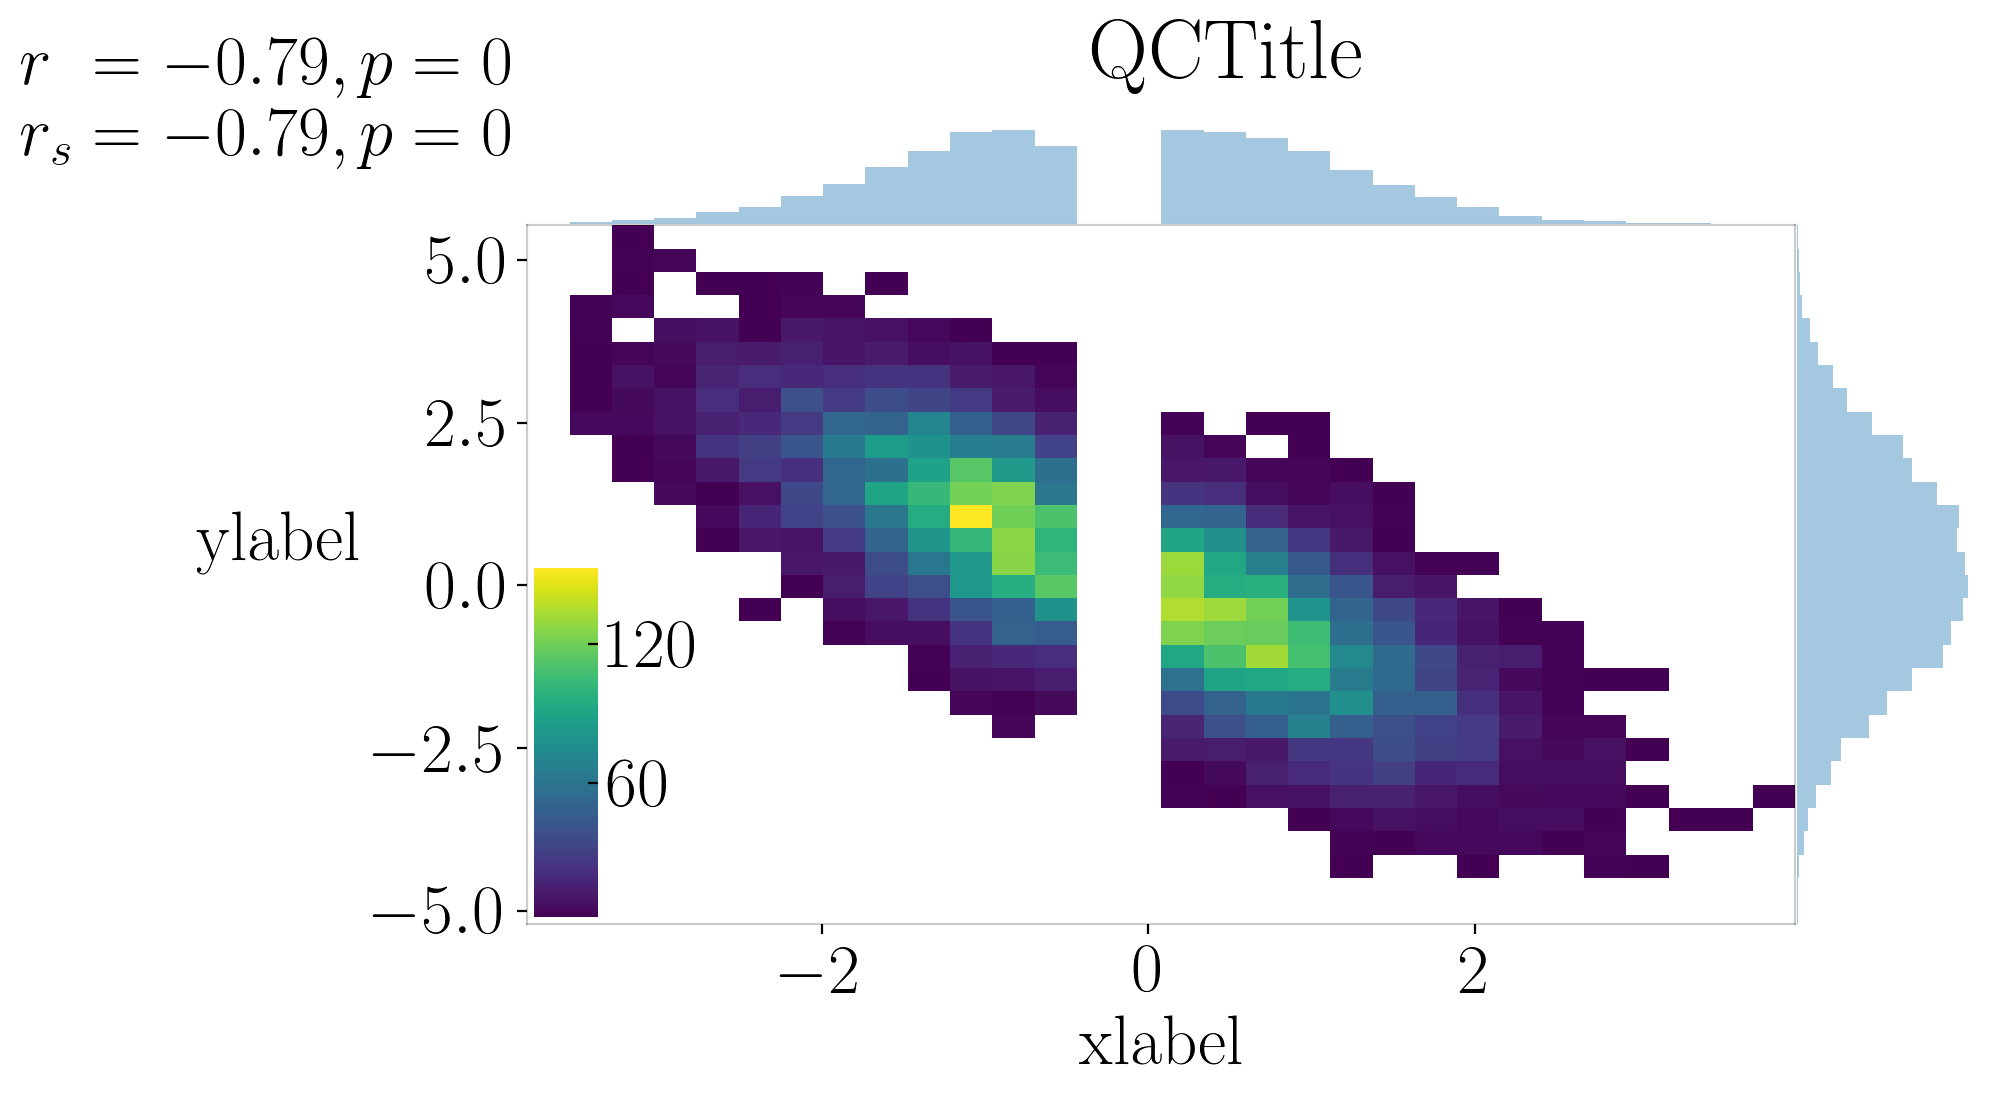

In [352]:
N = 10_000

np.random.seed(100)
x = np.random.randn(N)
x[x<0]-=  0.5
x[x>0]+=  .1
y = np.random.randn(N)-x

# uniformize x data
x_bin_uniform, y_bin_uniform, bins, bin_uniform_idx = bin_data(x,y,bins_num=100, points=100, xscale="lin")
fig, h2 = hist2d_marginals(x,y, cb_loc='lower left', xlabel='xlabel', ylabel='ylabel', title='QCTitle', cmin=2,)#log=(0,1)) # norm=mpl.colors.LogNorm(),

Pearsons correlation: \(r=-0.7562160497086873, p=0.0\)
Spearman correlation: \(r_s=-0.7582771080645444, p=0.0\)


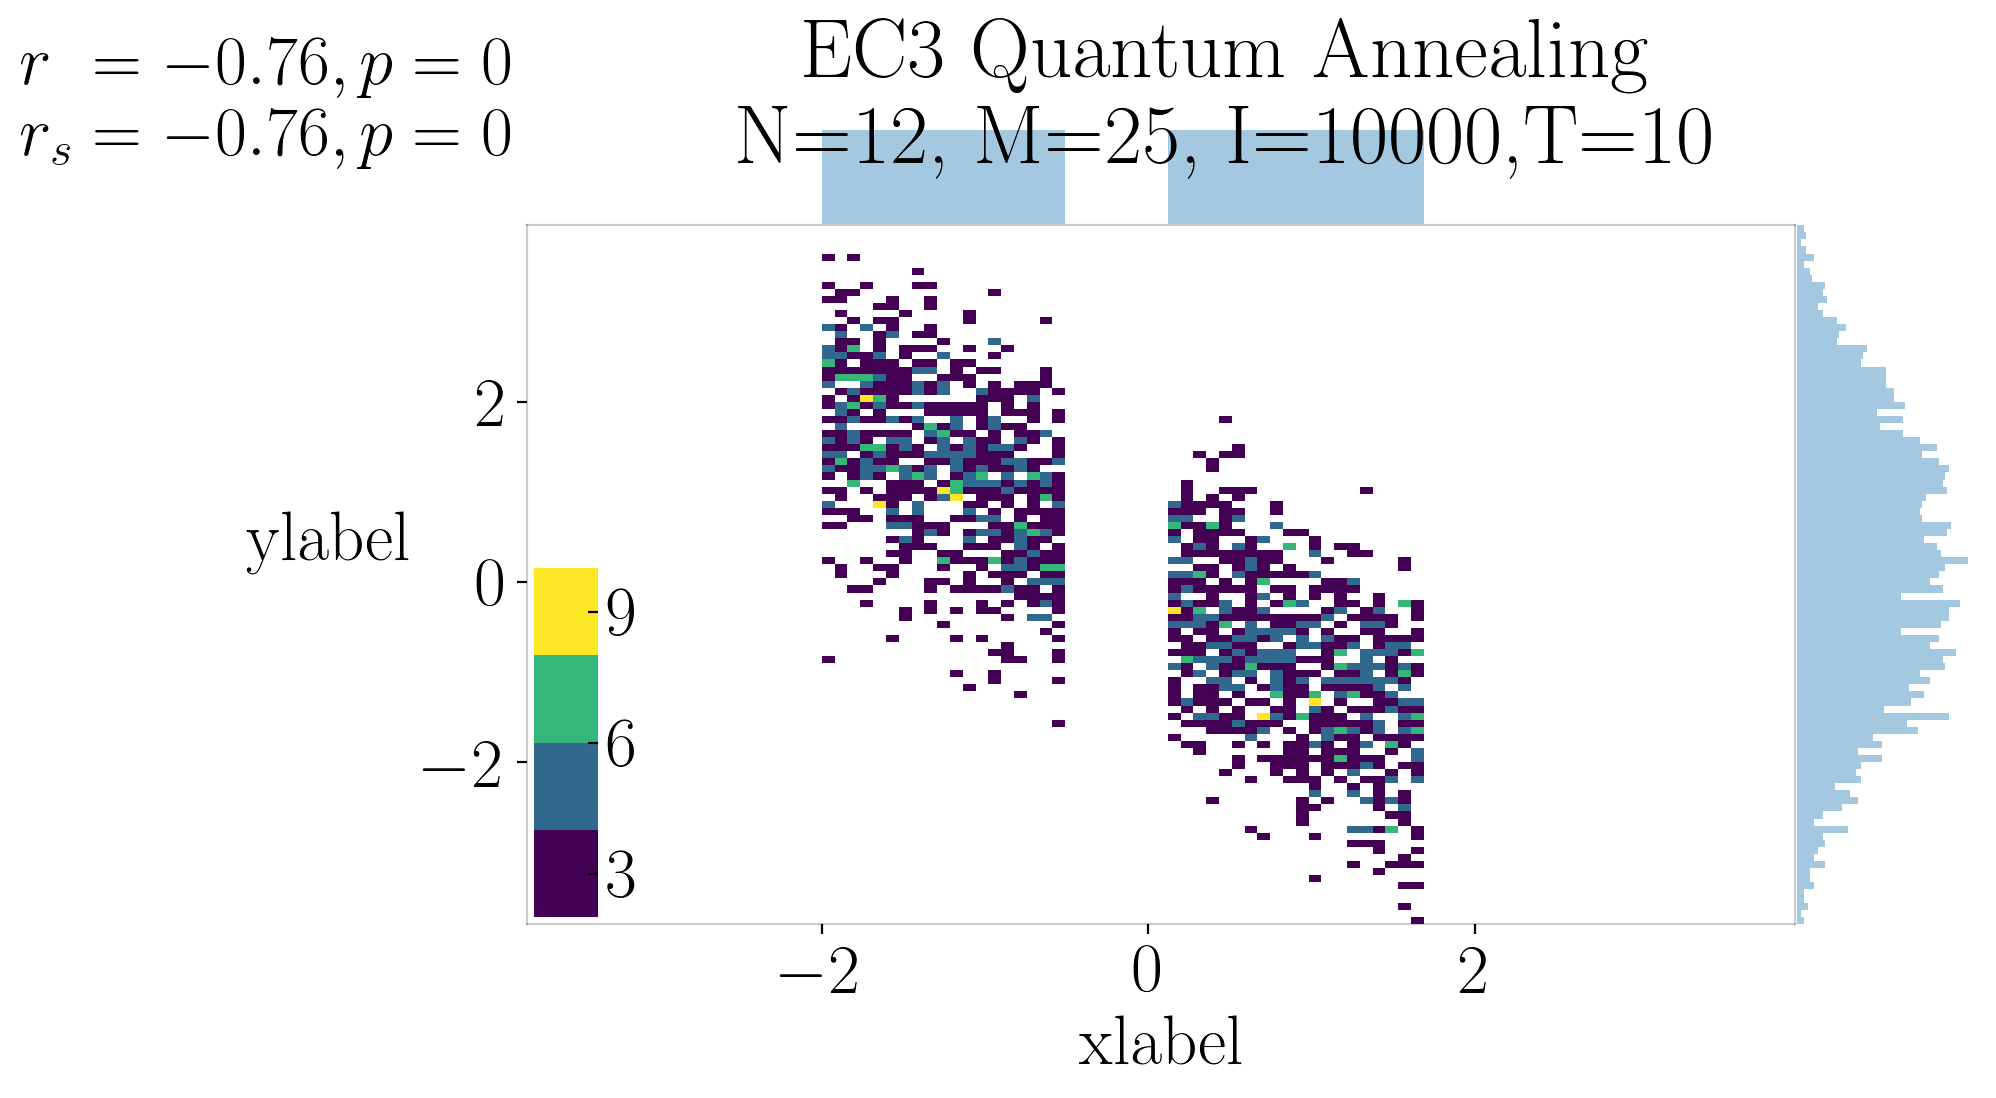

In [338]:
fig = hist2d_marginals(x_bin_uniform.reshape(-1),y_bin_uniform.reshape(-1), bins=bins, cb_loc='lower left', xlabel='xlabel', ylabel='ylabel', cmin=2, title=title)

## Preprocess data

In [ ]:
gs_energies = np.min(res['res_hamiltonian_diag'], axis=-1, keepdims=True)  # I
gs_ = res['res_hamiltonian_diag'] == gs_energies.repeat(res['res_hamiltonian_diag'].shape[-1], axis=-1)  # I; 2**N
count_gs = np.sum(gs_,axis=-1)  # I

# unique GS
gs_unique_mask = count_gs==1
# very degenerate GS
# gs_unique_mask = count_gs>7
# all number of GS
# gs_unique_mask = np.ones_like(count_gs) ==1

In [481]:
X_train = res['res_mc_timelines_energy'][gs_unique_mask] # Instances, mcTimessteps, mc_repetitions
# res['res_fidelity'] # Instances, (solve_ivp_steps)
Y_train = np.array([f[-1] for f in res['res_fidelity'][gs_unique_mask]]) # I

In [482]:
X_train.shape, Y_train.shape

((4635, 100, 10), (4635,))

## Simple metrics

#### as the probability of finding at least one GS in 10 trials.

In [378]:
# x = np.array([[34, 56, 89, 0.1, 69, 980,567], # -> True
#               [34, 56, 89, 0  , 69, 980,567]]) # -> False
# print(x)
# print(x.shape)

# # Test if none of the elements 
# # of the said array is zero
# print(np.all(x, axis=-1))
# # np.all()=True => there is no zero
# # np.all()=False => there is at least one zero

In [421]:
print("Instances, T MC steps, MC trials")
X_train.shape, Y_train.shape

Instances, T MC steps, MC trials


((10000, 100, 10), (10000,))

In [422]:
title = 'EC3 Quantum Annealing\n'\
          f'N={data_args["num_spins"]}, M={data_args["num_clauses"]},'\
          f' I={data_args["num_instances"]},T={data_args["anneal_T"]}'
title

'EC3 Quantum Annealing\nN=12, M=10, I=10000,T=10'

In [435]:
# as the probability of finding at least one GS energy in 10 trials.
X_gs = X_train == np.expand_dims(gs_energies[gs_unique_mask],axis=-1).repeat(X_train.shape[1], axis=-2).repeat(X_train.shape[-1],axis=-1) # I_mask; mcsteps, repetitions

Pearsons correlation: \(r=0.5698395384341199, p=7.988337135668875e-304\)
Spearman correlation: \(r_s=0.5595807118133959, p=9.399020507137226e-291\)


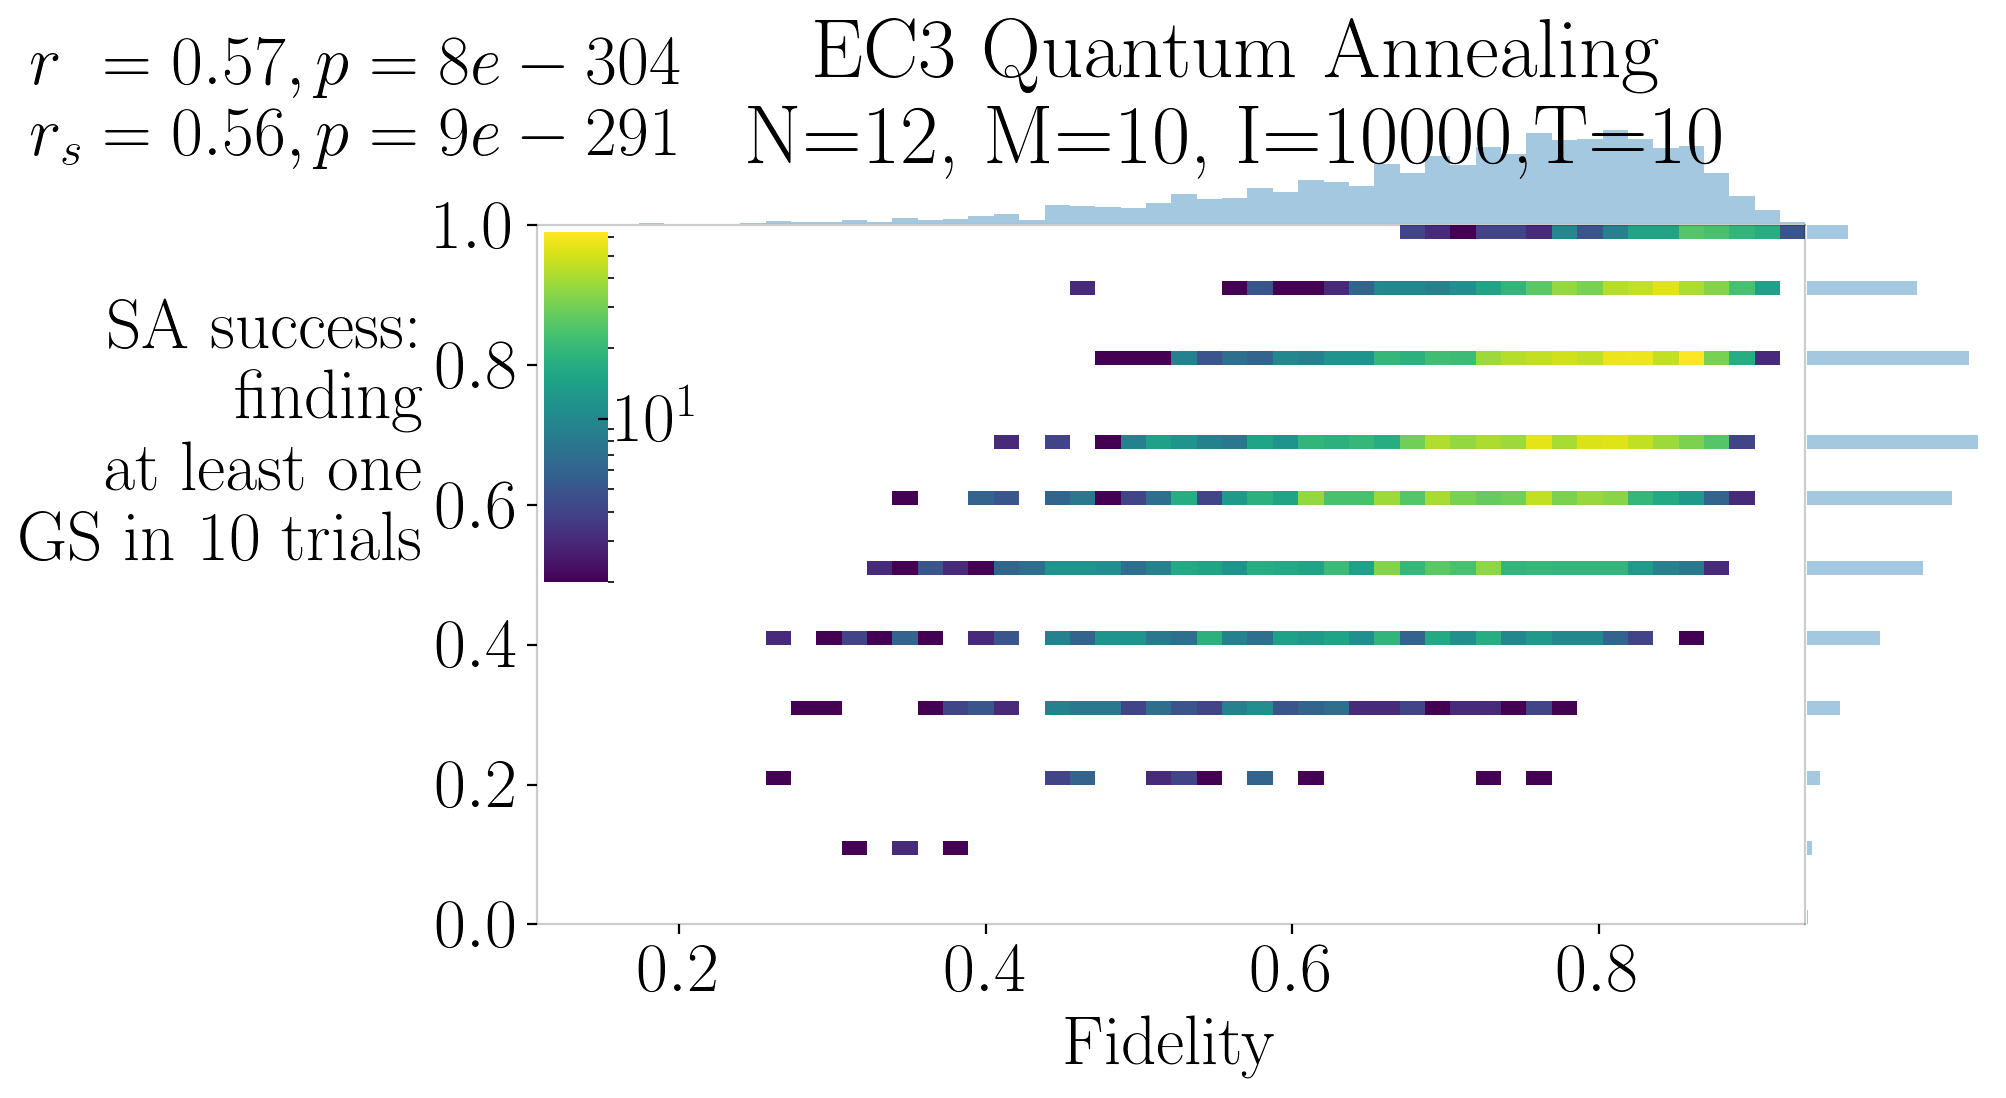

In [410]:
SA_s = np.any(X_gs, axis=(-2),).mean(-1) # !=0
#SA_s = 1-np.all(X_gs==0, axis=(-2),).mean(-1) # .sum()/8000/10 -> 20% has no zero

# Compare with Fidelity
xlabel = "Fidelity"; ylabel = 'SA success:\n' 'finding\n at least one\nGS in 10 trials'
fig = hist2d_marginals(Y_train,SA_s, cmin=2, bins=50, norm=mpl.colors.LogNorm(),
                 xlabel=xlabel, ylabel=ylabel, title=title, log=0)


# uniformized x data
x_bin_uniform, y_bin_uniform, bins, bin_uniform_idx = bin_data(Y_train,SA_s,bins_num=50, points=100, xscale="lin")

Pearsons correlation: \(r=0.4060348319609679, p=1.492948164330609e-64\)
Spearman correlation: \(r_s=0.4085097526009914, p=2.151723830941851e-65\)


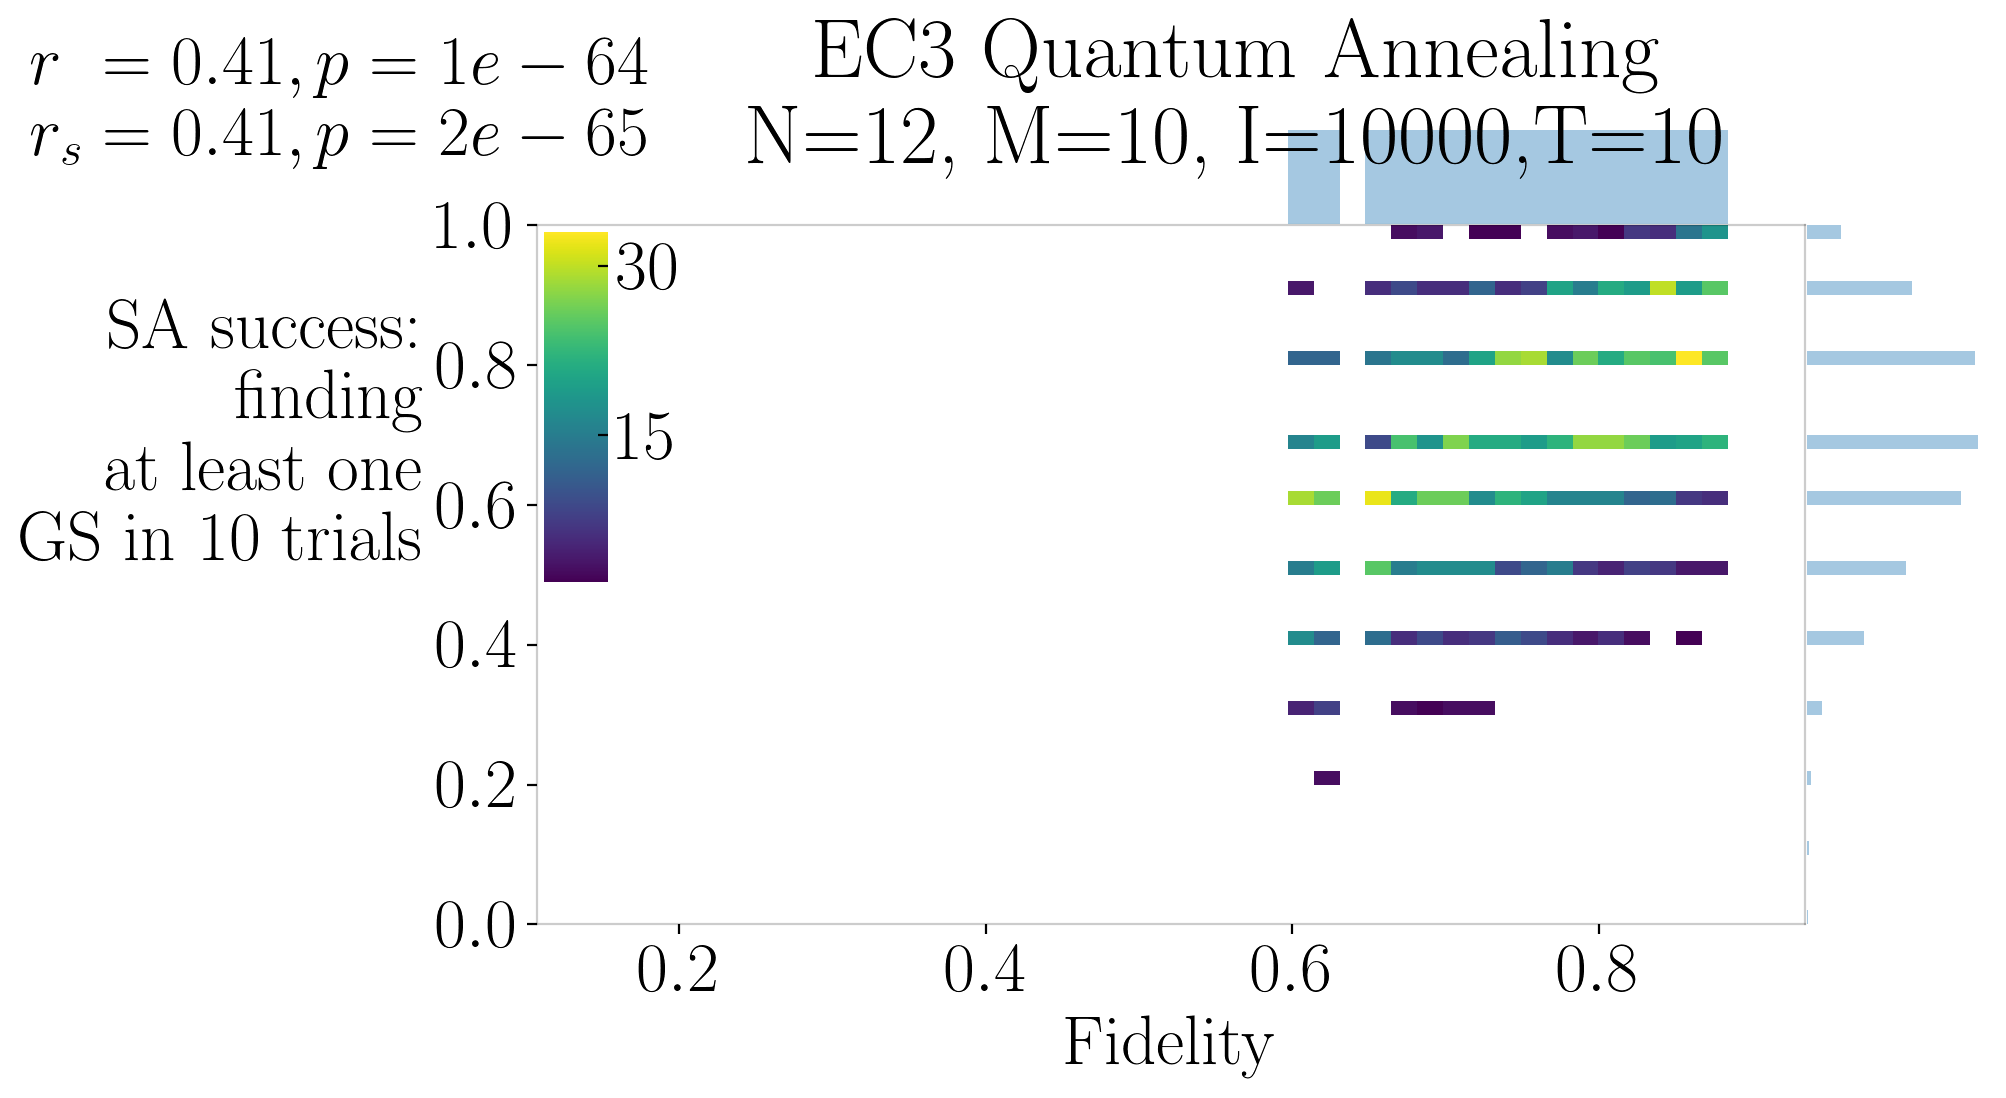

In [411]:
fig2 = hist2d_marginals(x_bin_uniform.reshape(-1),y_bin_uniform.reshape(-1), cmin=2, bins=(bins, 50), 
                 xlabel=xlabel, ylabel=ylabel, title=title,)

#### as the mean number of GS in the MC trials

In [384]:
Y_train.shape,X_gs.shape, SA_s.shape

((10000,), (10000, 100, 10), (10000,))

Pearsons correlation: \(r=0.3835674952768856, p=2.235328444385994e-124\)
Spearman correlation: \(r_s=0.3853355578338448, p=1.325757112843859e-125\)


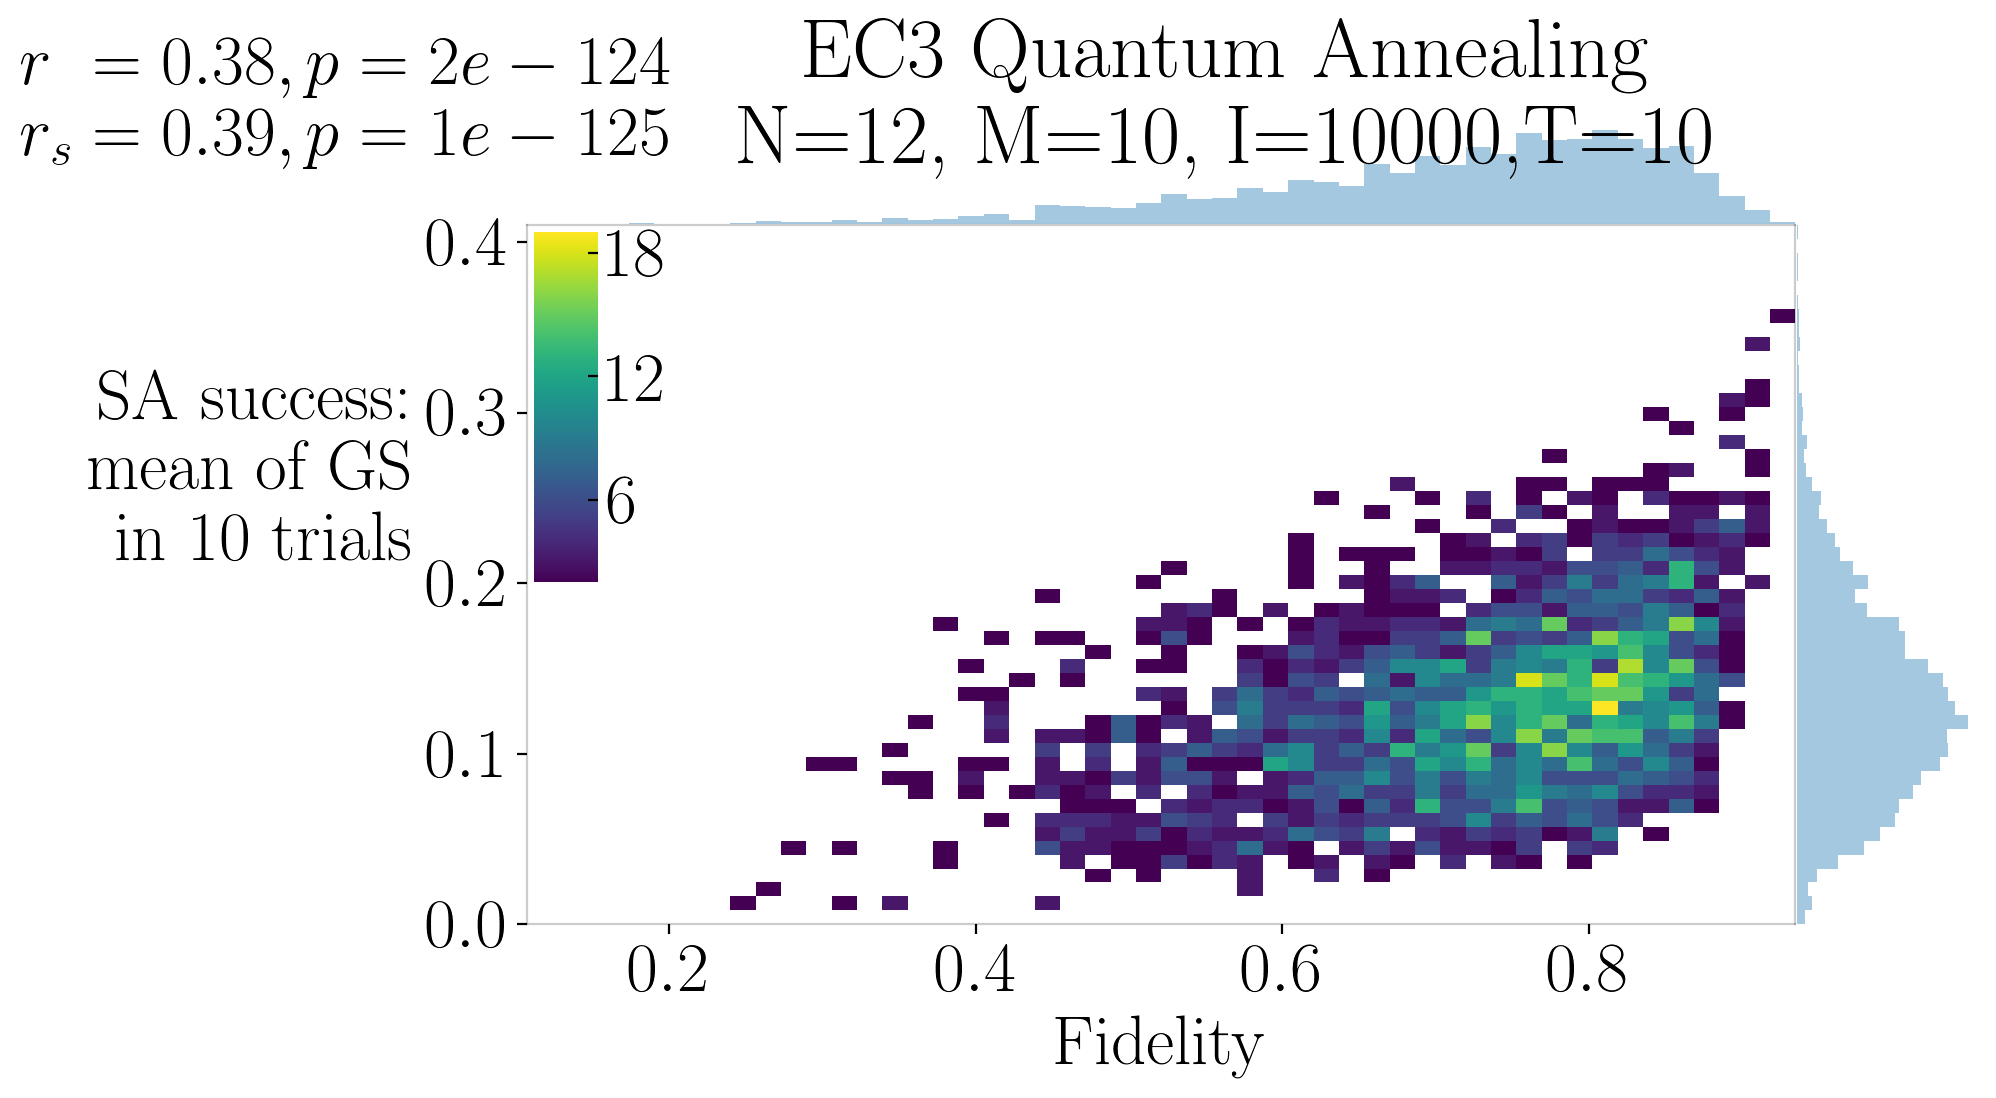

In [412]:
# as the mean number of GS in the MC trials.
ylabel = 'SA success:\n' 'mean of GS\nin 10 trials'
SA_s = X_gs.mean(1).mean(-1) # np.count_nonzero(X_train==0, axis=(-2)).mean(-1)
# SA_s = np.log(SA_s)
# SA_s[SA_s==-np.inf]=0

fig = hist2d_marginals(Y_train,SA_s,cmin=2, bins=50, #norm=mpl.colors.LogNorm(),
                 xlabel=xlabel, ylabel=ylabel, title=title)

# uniformized x data
x_bin_uniform, y_bin_uniform, bins, bin_uniform_idx = bin_data(Y_train,SA_s,bins_num=50, points=100, xscale="lin")

Pearsons correlation: \(r=0.24141375566872558, p=1.192155693848374e-22\)
Spearman correlation: \(r_s=0.24498346845553645, p=2.689746510721504e-23\)


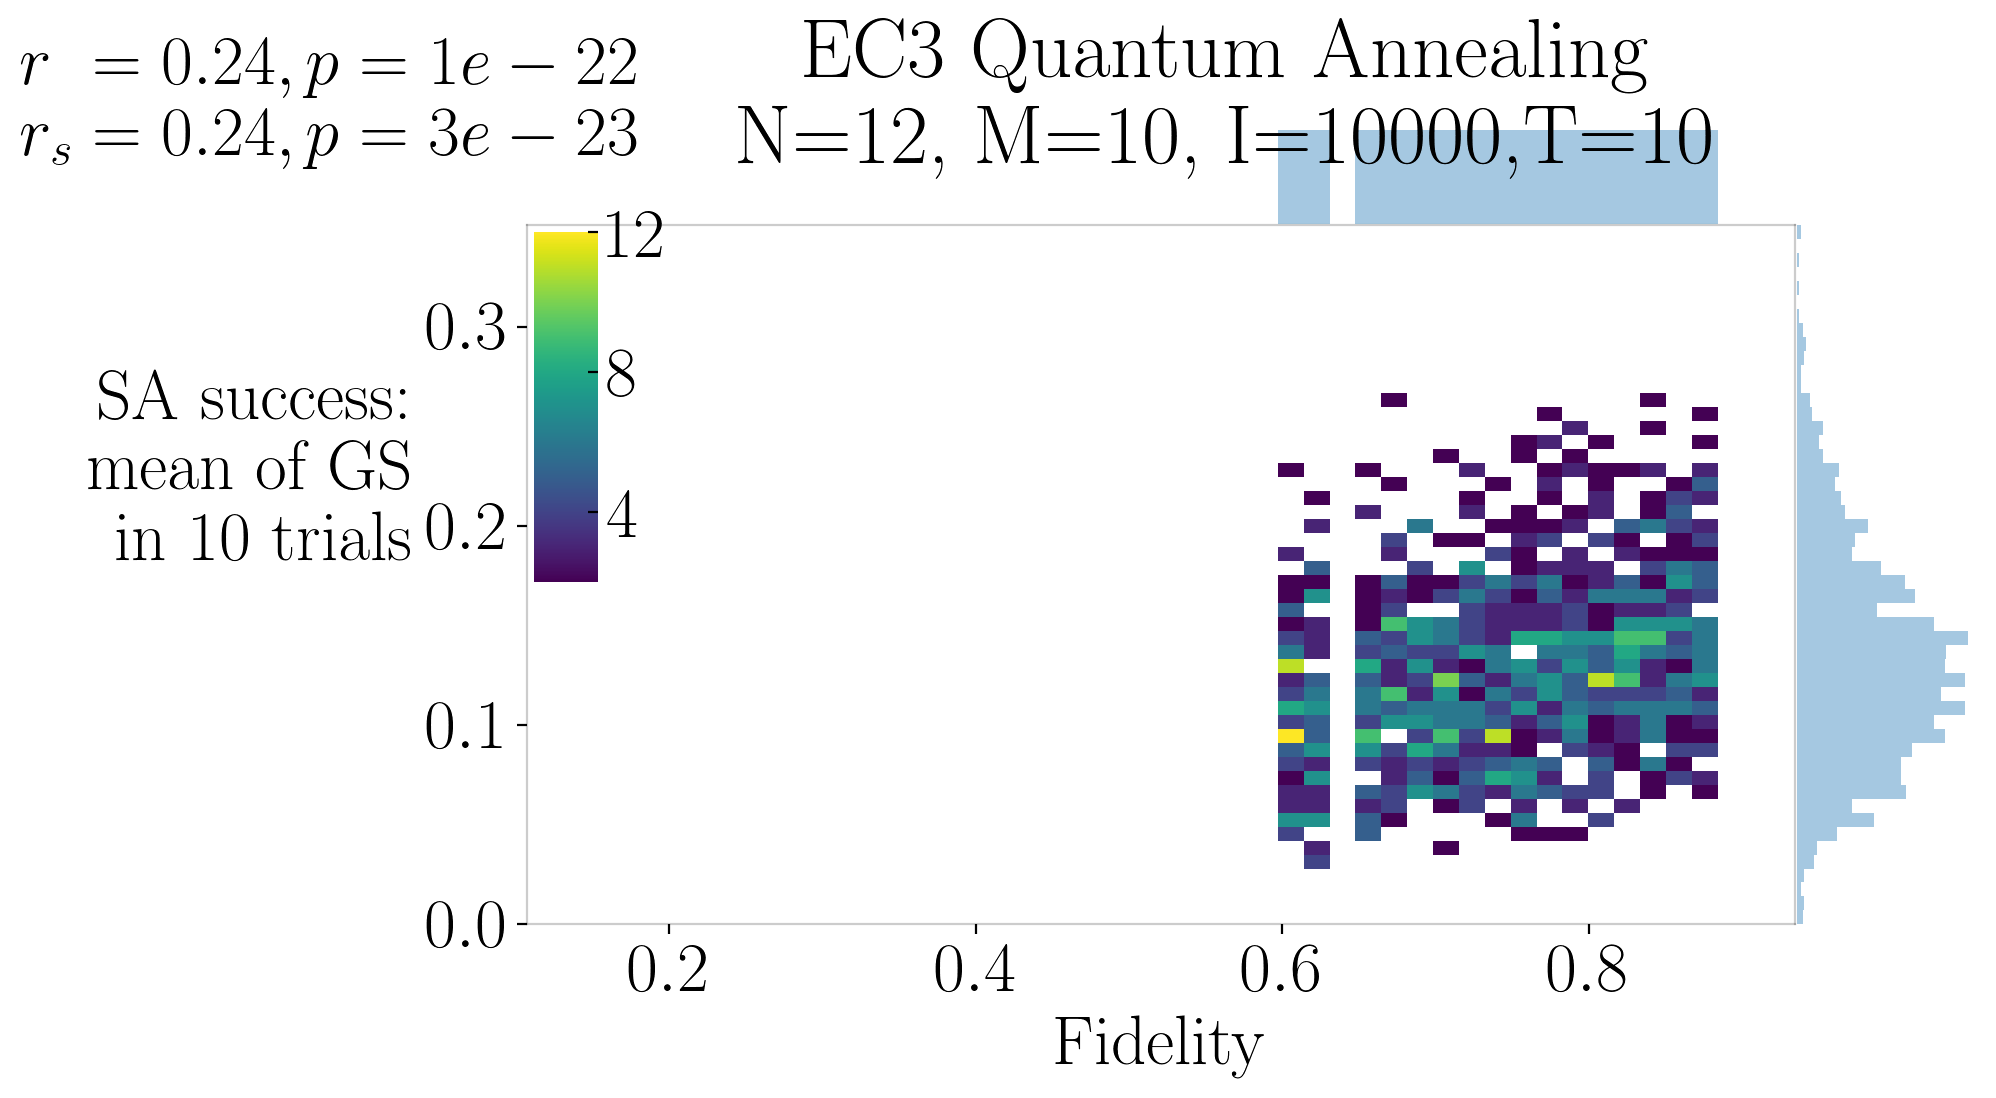

In [413]:
fig2 = hist2d_marginals(x_bin_uniform.reshape(-1),y_bin_uniform.reshape(-1), cmin=2, bins=(bins, 50), 
                 xlabel=xlabel, ylabel=ylabel, title=title,)

#### as mean time-to-solution

In [483]:
print("Instances, T MC steps, MC trials")
X_train.shape, Y_train.shape

Instances, T MC steps, MC trials


((4635, 100, 10), (4635,))

In [446]:
@njit
def first_zero_time_(data, gs_energies_masked):
    first_zero_time = np.ones(data.shape[:-1], dtype=np.uint16)*101 # out of the 100 timesteps 
    for i, instance in enumerate(data):
        for j,mc_trial in enumerate(instance):
            for k,energy in enumerate(mc_trial):
                if energy==gs_energies_masked[i]: 
                    first_zero_time[i,j]=k
                    break
    return first_zero_time

In [484]:
data = X_train.transpose(0,2,1)

first_zero_time = first_zero_time_(data, gs_energies[gs_unique_mask])

# as the mean time (MC steps) at which you find the first GS: "time-to-solution".
ylabel = 'SA success:\n' 'mean time\nto first GS\nin 10 trials'
SA_s = first_zero_time.mean(-1)

In [485]:
# uniformized x data
x_bin_uniform, y_bin_uniform, bins, bin_uniform_idx = bin_data(Y_train,SA_s,bins_num=50, points=100, xscale="lin")

Pearsons correlation: \(r=-0.10590092165399902, p=4.89395692524019e-13\)
Spearman correlation: \(r_s=-0.11322143736639863, p=1.0670445000737705e-14\)


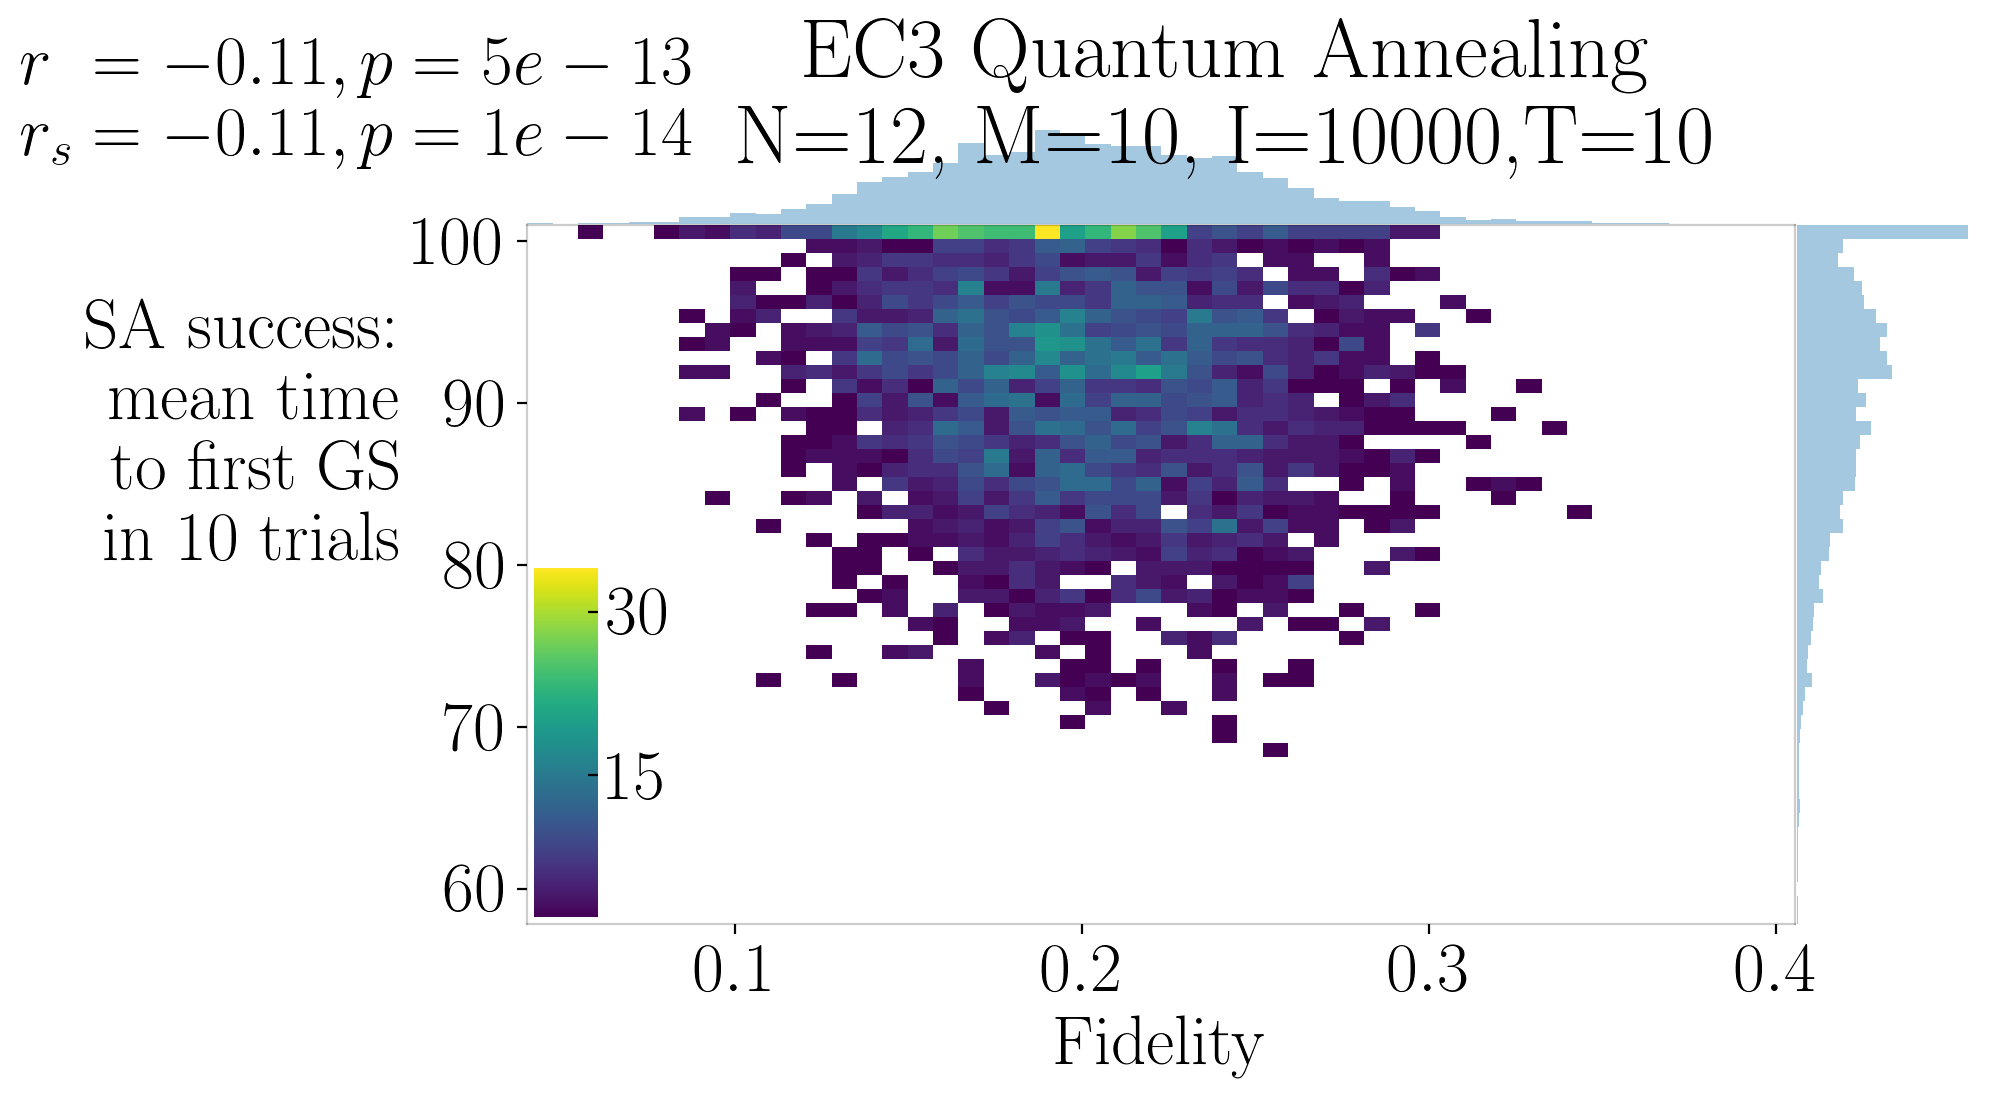

In [486]:
fig = hist2d_marginals(Y_train,SA_s,cmin=2, bins=50, #norm=mpl.colors.LogNorm(),
                 xlabel=xlabel, ylabel=ylabel, cb_loc='lower left',title=title)

Pearsons correlation: \(r=-0.1313409225858164, p=9.129380805225339e-09\)
Spearman correlation: \(r_s=-0.13349903063451818, p=5.175695015595291e-09\)


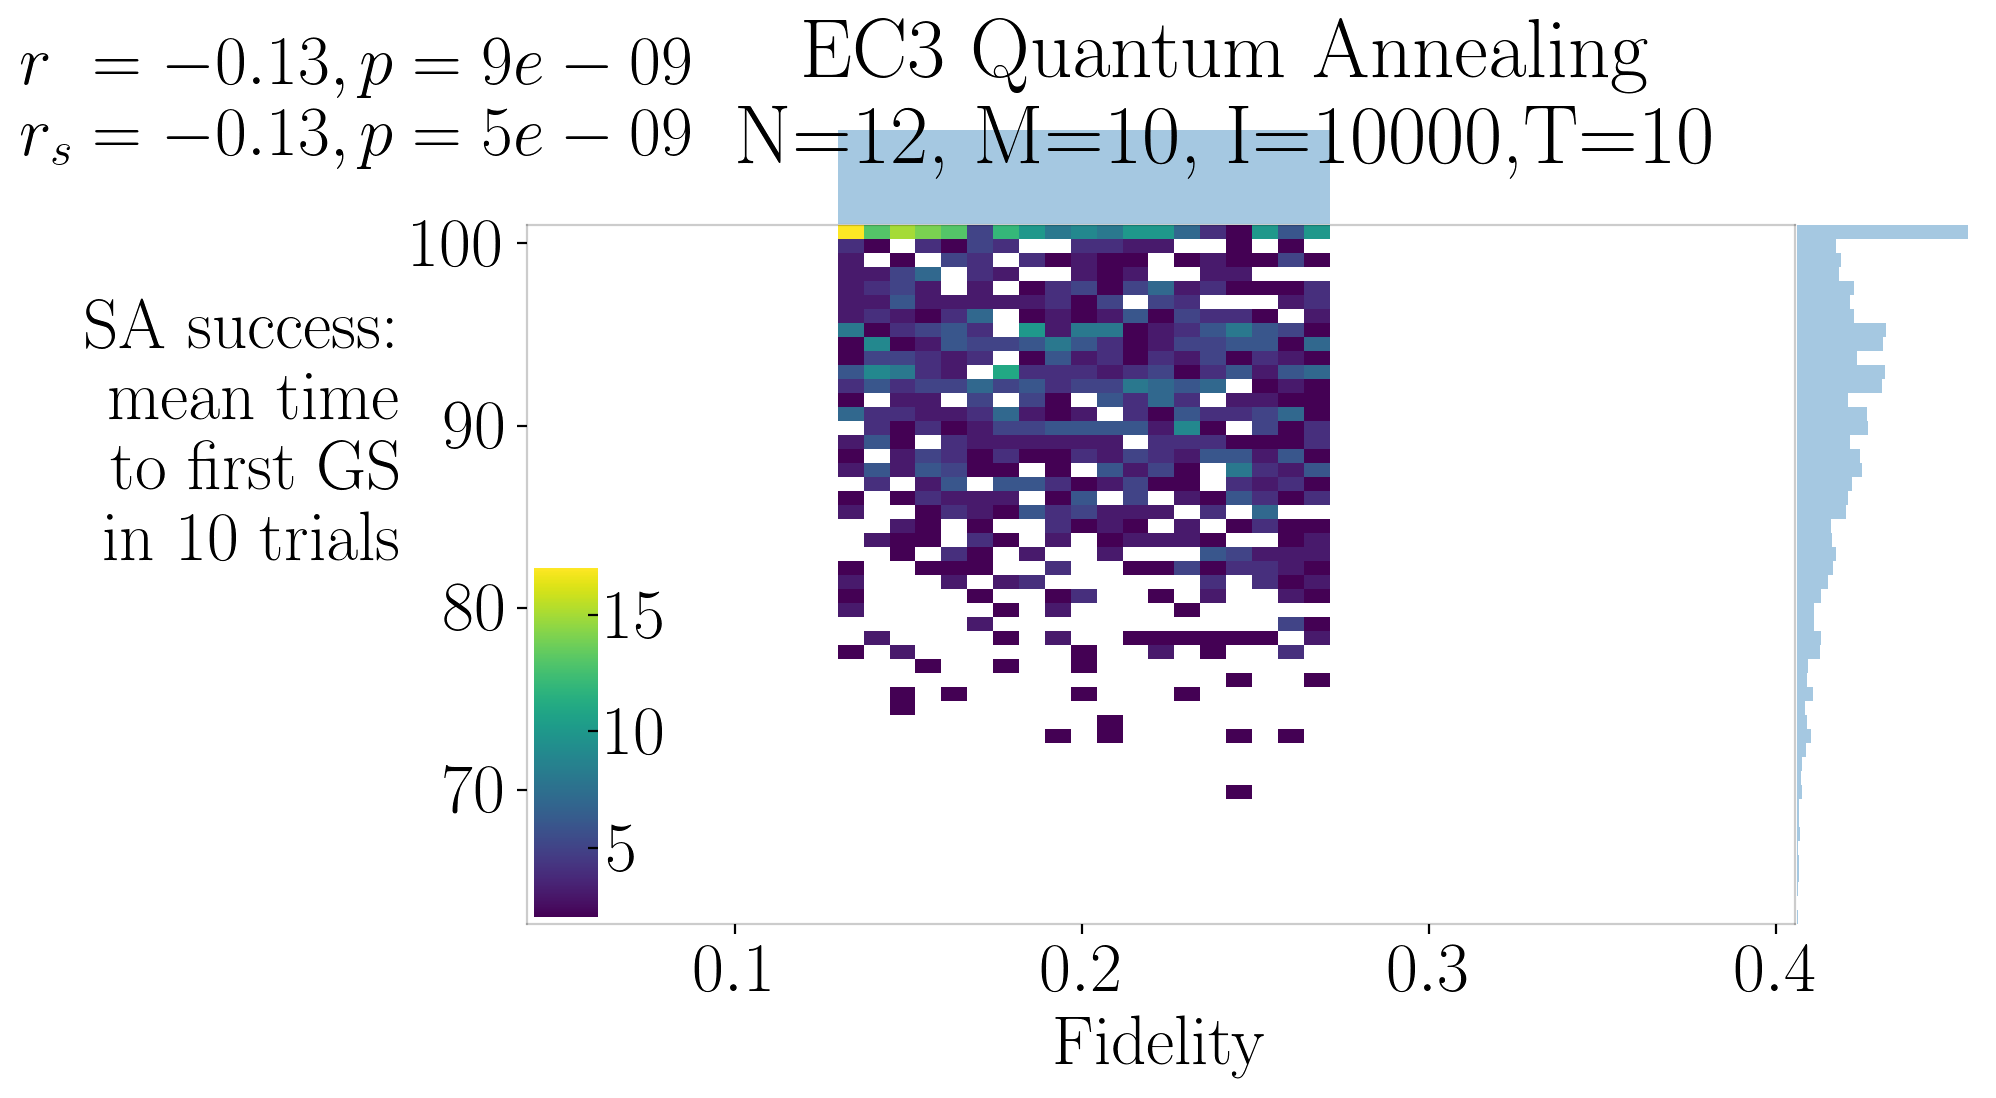

In [487]:
fig2, h2 = hist2d_marginals(x_bin_uniform.reshape(-1),y_bin_uniform.reshape(-1), cb_loc='lower left', cmin=2, bins=(bins, 50), 
                 xlabel=xlabel, ylabel=ylabel, title=title,)

# ML prediction vs true fidelity

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# workaround needed in Colab
import os
from filelock import FileLock

In [ ]:
from ray import tune
from ray.tune import JupyterNotebookReporter # CLIReporter
from ray.tune.schedulers import ASHAScheduler
from ray.tune.integration.keras import TuneReportCallback
# https://docs.ray.io/en/latest/tune/examples/tune_mnist_keras.html

In [ ]:
class CausalCNNRegressor:
    def load(self, num_spins, num_clauses, num_mc_runs, start_temperature, number,
             test_size=0.2, as_channels=True, mc_channels=10):      
        self.num_spins = num_spins
        self.num_clauses = num_clauses
        self.num_mc_runs = num_mc_runs
        if isinstance(num_clauses, int):
            num_clauses = [num_clauses]
        ds_size = 10000
        ftrs = np.zeros([ds_size*len(num_clauses), num_mc_runs, 10])
        lbls = np.zeros([ds_size*len(num_clauses)])
        for i,num_clauses in enumerate(num_clauses):     
            # Loads and prepares data. The path should be adjusted depending on where your 
            # data is.
            file_name = f'ec3_sim_anneal_spins{7}_clauses{num_clauses}' + \
                f'_runs{num_mc_runs}_temp{start_temperature}_{number}'
            path = f'./data/raw/ec3-anneal-data_2021-10-21_1431/{file_name}.npz'
            # workaround needed in Colab
            # https://github.com/ray-project/ray/issues/5614#issuecomment-527292289
            with FileLock(os.path.expanduser("~/.data.lock")):
                data = np.load(path)
            
                # Assign features and labels
                ftrs[ds_size*i:ds_size*(i+1)] = data['res_mc_timelines'] # simulated annealing energy: int [0,N_spins??]
                lbls[ds_size*i:ds_size*(i+1)] = data['res_fidelity'][:, -1] # quantum annealing fidelity: float [0,1]

                
        # Transformations:
        # log E
        # with np.errstate(divide='ignore'):
        #     ftrs = np.log(ftrs)
        # ftrs[np.isneginf(ftrs)]=0

        # Delta E: input increments instead of energies
        # ftrs = np.subtract(ftrs[:,1:],ftrs[:,:-1]) # overfits

        # max normalization [min,1]
        ftrs = ftrs / ftrs.max()
        
        # Perform min max normalization for the features [0,1]
        # ftrs = ftrs - ftrs.min()
        # ftrs /= ftrs.max() - ftrs.min()
        
        # Split train/test data for the full Hamiltonian.
        X_train, X_test, Y_train, Y_test = train_test_split(
            ftrs, lbls, test_size = test_size,)
        
        if mc_channels < X_train.shape[2]:
            X_train = X_train[...,:mc_channels]
            X_test = X_test[...,:mc_channels]
        # ---------%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%----------------------------
        # B, T, MC_trials -> B*MC_trials, T, 1Channel
        # tf.reshape(tf.transpose(regressor.X_train[0:2], [0,2,1]),(2*10,-1))
        if not as_channels:
            mc_trials=X_train.shape[2] # number of MC trials
            X_train_size = X_train.shape[0]*mc_trials
            X_train = np.reshape(np.transpose(X_train, [0,2,1]),(X_train_size,-1,1))
            X_test_size = X_test.shape[0]*mc_trials
            X_test = np.reshape(np.transpose(X_test, [0,2,1]),(X_test_size,-1,1))
            # B -> B*MC_trials
            Y_train = Y_train.repeat(mc_trials)
            Y_test = Y_test.repeat(mc_trials)
        # ---------%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%----------------------------


        self.X_train, self.X_test = X_train, X_test 
        self.Y_train, self.Y_test = Y_train, Y_test 

    def build_model(self, learn_rate, num_conv, num_dense):
        # workaround needed in Colab
        # https://github.com/ray-project/ray/issues/5614#issuecomment-527292289
        from tensorflow import keras

        keras.backend.clear_session()
        model = keras.Sequential(name='Causal_CNN_regressor')
        # initial 1x1 conv to create channels (kind of regularization or data augmentation)
        model.add(keras.layers.Conv1D(2**7, (1,), activation = 'tanh', 
            padding = 'valid', strides = 1))
        # first conv with kernel_size=2 and normal stride so it covers everything with overlap
        model.add(keras.layers.Conv1D(2**2, (num_conv,), activation='tanh', 
            padding='valid', strides=1, ))#kernel_initializer='he_normal' ))#input_shape=(100,1)))
        # strided convs
        model.add(keras.layers.Conv1D(1, (2*num_conv,), activation='tanh', 
            padding='valid', strides=num_conv)) # overlap or not? yes, do it to learn pooling.
        model.add(keras.layers.Conv1D(1, (num_conv,), activation='tanh',
            padding='valid', strides=num_conv))
        model.add(keras.layers.Conv1D(1, (2*num_conv,), activation='elu', # last convolution with elu works well
            padding='valid', strides=num_conv))
        
        # model.add(keras.layers.Conv1D(1, (1,), activation = 'sigmoid', 
        #     padding = 'valid', strides = 1))

        # 1x1 conv to reduce channels
        # model.add(keras.layers.Conv1D(1, (1,), activation = 'elu', 
        #     padding = 'valid', strides = 1))
        # model.add(keras.layers.GlobalAvgPool1D(keepdims=True)) # en T

        model.add(keras.layers.Flatten()) #------------------ ----------
        
        model.add(keras.layers.Dense(num_dense, activation = 'relu'))
        # model.add(keras.layers.Dense(num_dense, activation = 'relu'))
        model.add(keras.layers.Dense(1, activation = 'sigmoid')) # to strict output in [0,1] range.
        # model.add(keras.layers.Conv1D(1, (1,), activation = 'tanh', 
        #     padding = 'valid', strides = 1))
        # model.add(keras.layers.Conv1D(1, (1,), activation = 'tanh', 
        #     padding = 'valid', strides = 1))
        # model.add(keras.layers.Reshape((num_dense,1)))
        # model.add(keras.layers.Conv1D(1, (4,), activation = 'tanh', 
        #     padding = 'valid', strides = 2))
        # model.add(keras.layers.Conv1D(1, (1,), activation = 'sigmoid', 
        #     padding = 'valid', strides = 1))
        # model.add(keras.layers.Flatten())
        # model.add(keras.layers.Dense(1, activation = 'sigmoid')) # to strict output in [0,1] range.

        # Tried Cyclic learning rate scheduler, no improvement in one shot.
        # BATCH_SIZE = 128
        # INIT_LR = 1e-4
        # MAX_LR = 1e-2

        # steps_per_epoch = len(self.X_train) // BATCH_SIZE
        # clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
        #     maximal_learning_rate=MAX_LR,
        #     scale_fn=lambda x: 1/(2.**(x-1)),
        #     step_size=2 * steps_per_epoch
        # )
        # it is already implemented in keras:
        # decay_steps = 1000
        # initial_learning_rate = learn_rate
        # clr = tf.keras.optimizers.schedules.CosineDecay( # CosineDecayRestarts
        #     initial_learning_rate, decay_steps)
        # learn_rate = clr
        # decayed_lr = tf.keras.optimizers.schedules.ExponentialDecay(
        #     initial_learning_rate, decay_steps, decay_rate, staircase=True, name=None)


        model.compile(loss='mae',
                      optimizer=keras.optimizers.Adam(learn_rate),
                      metrics=['mae'],
                      )

        self.model = model
        
    def training(self, epochs, batch_size=128, Ray=True, keras_verbose=0, early=False):
        # Introduce early stopping
        stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
            patience = 100)

        callbacks =[]
        # Ray Tune needs some feedback from the training via the Callbacks
        if Ray:
            callbacks += [TuneReportCallback({"loss": "mae", "val_loss": "val_loss",
                                        #   "iteration": "epoch"
                                          })]
        if early:
            callbacks += [stop_early]

        self.hist = self.model.fit(self.X_train, self.Y_train, epochs = epochs,
            verbose = keras_verbose,
            validation_split = .2, batch_size = batch_size,\
            callbacks = callbacks)

In [ ]:
# load data
regressor = CausalCNNRegressor()
regressor.load(7, 5, 100, 10, 1)
print("Instances, T MC steps, MC trials")
regressor.X_train.shape, regressor.Y_train.shape

plt.plot(regressor.X_train[3]);
plt.axhline(0);
regressor.Y_train[3]

# compute Simulated Annealing success

x = np.array([[34, 56, 89, 0.1, 69, 980,567], # -> True
              [34, 56, 89,0, 69, 980,567]]) # -> False
print(x)
print(x.shape)
  
# Test if none of the elements 
# of the said array is zero
print(np.all(x, axis=-1))
# np.all()=True => there is no zero
# np.all()=False => there is at least one zero

# as the probability of finding at least one zero energy in 10 trials.
SA_s = 1- np.all(regressor.X_train, axis=(-2),).mean(-1)#.sum()/8000/10 -> 20% has no zero

# Compare with Fidelity
xlabel = "Fidelity"; ylabel = 'SA success'
# title = 'SA succes as '
hist2d_marginals(regressor.Y_train,SA_s, cmin=1, bins=50, norm=mpl.colors.LogNorm(),
                 xlabel=xlabel, ylabel=ylabel)

print("Instances, T MC steps, MC trials")
regressor.X_train.shape, regressor.Y_train.shape

# as the number of zeros in the MC trials.
SA_s = np.count_nonzero(regressor.X_train==0, axis=(-2)).mean(-1)
# SA_s = np.log(SA_s)
# SA_s[SA_s==-np.inf]=0

hist2d_marginals(regressor.Y_train,SA_s,cmin=1, bins=100, norm=mpl.colors.LogNorm(),
                 xlabel=xlabel, ylabel=ylabel)

print("Instances, T MC steps, MC trials")
regressor.X_train.shape, regressor.Y_train.shape

data = regressor.X_train.transpose(0,2,1)

first_zero_time = np.ones(data.shape[:-1])*101
for i, instance in enumerate(data):
    for j,trial in enumerate(instance):
        for k,T in enumerate(trial):
            if T==0: 
                first_zero_time[i,j]=k
                break

# as the time at which you find the first 0.
SA_s = first_zero_time.mean(-1)

hist2d_marginals(regressor.Y_train,SA_s,cmin=1, bins=100, norm=mpl.colors.LogNorm(),
                 xlabel=xlabel, ylabel=ylabel)

hist2d_marginals(regressor.Y_train.repeat(10),first_zero_time.reshape(-1), bins=(50,100), norm=mpl.colors.LogNorm(), cb_loc='center left',
                 xlabel=xlabel, ylabel=ylabel)

# Next

In [ ]:
# 20220601
# generate MC data
# discard 4,5 M clauses because has roughly 90% degeneracy
# keep only one GS, unique GS
# determine timescale for MC such that the classical data generation is much easier than solving the problem
# Expected explored states? = N * 2**N
# repeat correlations analysis bw SA succes and fidelity
# stick with N as large as possible to manage data creation,
# N=10 has 1024 states so MCsteps around 100 steps with a single repetition.